In [22]:
import mne
import pathlib
import pandas as pd

import asrpy
import numpy as np
import matplotlib.pyplot as plt

In [23]:
mne.utils.set_config('MNE_USE_CUDA', 'true')  

In [24]:
data_dir = "../"
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('..')

In [25]:
# sub-13 = HTR,
# sub-26 = CTR,
# sub-62 = VIP,
# sub-80 = SNY

In [26]:
files1 = list(data_dir.glob("sub-013/eeg/*.bdf"))
files2 = list(data_dir.glob("sub-026/eeg/*.bdf"))
files3 = list(data_dir.glob("sub-062/eeg/*.bdf"))
files4 = list(data_dir.glob("sub-080/eeg/*.bdf"))

In [27]:
files = files1 + files2 + files3 + files4

In [28]:
%%capture
rawData = []
for f in files:
    raw = mne.io.read_raw_bdf(f,preload=True)
    total_time_sec = raw.times[-1] - raw.times[0]
    if total_time_sec >= 600:
        rawData.append(raw)

In [30]:
len(rawData)

16

In [38]:
for i in range(16):
    print(rawData[i].info['ch_names'])

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
['Fp1', 'AF7', 'AF

In [37]:
channels2drop1 = rawData[0].info['ch_names'][-9:]
channels2drop2 = rawData[5].info['ch_names'][-16:]

In [40]:
rawDropped = []
for i in range(16):
    if(i<4):
        rawDropped.append(rawData[i].drop_channels(channels2drop1))
    else:
        rawDropped.append(rawData[i].drop_channels(channels2drop2))

In [41]:
rawDropped[12]

<RawEDF | sub-080_task-think2_eeg.bdf, 64 x 637952 (623.0 s), ~311.6 MB, data loaded>

In [43]:
for i in range(16):
    print(rawDropped[i].info['ch_names'])

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO

In [44]:
start_time = 0  # start time in seconds
end_time = 600    # end time in seconds
rawTrimmedData = []
for raw in rawDropped:
    raw_trimmed = raw.copy().crop(tmin=start_time, tmax=end_time)
    rawTrimmedData.append(raw_trimmed)

In [45]:
%%capture
# Downsample the data to 256 Hz
fs_new = 256  # New sampling frequency in Hz
rawDownSampled = []
for raw in rawTrimmedData:
    raw_ds = raw.resample(fs_new, n_jobs='cuda')
    rawDownSampled.append(raw_ds)

In [46]:
rawDownSampled[12]

<RawEDF | sub-080_task-think2_eeg.bdf, 64 x 153600 (600.0 s), ~75.1 MB, data loaded>

In [47]:
# Preprocessing
# Cleaning the entire EEG 
def get_filtered_eeg(raw):
    low_freq = 0.3
    high_freq = 100.0

    raw_filtered = raw.copy().notch_filter(freqs=50)

    # Apply the bandpass filter
    raw_filtered = raw_filtered.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin', n_jobs='cuda')

    #ASR cleaning with cutoff=20
    # asr = asrpy.ASR(sfreq=raw.info["sfreq"], cutoff=20)
    # asr.fit(raw_filtered)
    # raw_filtered = asr.transform(raw_filtered)

    ica = mne.preprocessing.ICA(n_components=15, max_iter="auto", random_state=97)
    ica.fit(raw_filtered)

    # # ica.plot_components()

    ica.exclude = []
    # find which ICs match the EOG pattern; no EOG attached, Taking Fp1 as proxy
    eog_indices, eog_scores = ica.find_bads_eog(raw_filtered,ch_name="Fp1")
    ica.exclude = eog_indices
    ica.apply(raw_filtered)
    return raw_filtered

In [48]:
%%capture
rawFiltered = []
for raw in rawDownSampled:
    rawFiltered.append(get_filtered_eeg(raw.copy()))

In [49]:
from mne.time_frequency import tfr_morlet

In [50]:
# Generate continuous data (e.g., a sine wave for simplicity)
fs = 256  # Sampling frequency in Hz
duration = 600  # Duration in seconds
# Define epoch parameters
epoch_length = 10  # in seconds
events = np.array([[i * epoch_length * fs, 0, 1] for i in range(duration // epoch_length)])
event_id = 1
tmin, tmax = 0, epoch_length  # Epoch start and end times

# Define Morlet wavelet parameters
frequencies = np.arange(8, 30, 1)  # Frequencies of interest from 1 to 50 Hz
n_cycles = frequencies / 2.  # Number of cycles in Morlet wavelet

In [51]:
epoch = mne.Epochs(rawFiltered[0], events, event_id, tmin, tmax, baseline=None, preload=True)

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 2561 original time points ...
1 bad epochs dropped


In [52]:
epoch

<Epochs |  59 events (all good), 0 – 10 s, baseline off, ~73.8 MB, data loaded,
 '1': 59>

In [53]:
%%capture
powerD = []
itcD = []
phaseD = []
for rawD in rawFiltered:
    epochs = mne.Epochs(rawD, events, event_id, tmin, tmax, baseline=None, preload=True)
    # Compute power and phase
    power,itc = mne.time_frequency.tfr_morlet(epochs, freqs=frequencies, n_cycles=n_cycles, use_fft=True, output='power',return_itc=True, n_jobs=20)
    # complex_signal = mne.time_frequency.tfr_array_morlet(epochs, sfreq=fs, freqs=frequencies, n_cycles=n_cycles,use_fft=True, output='complex', n_jobs=20)
    # phase = np.angle(complex_signal)    
    powerD.append(power)
    itcD.append(itc)
    # phaseD.append(phase)

In [55]:
channels = rawFiltered[0].info["ch_names"]
np.array(channels)

array(['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3',
       'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1',
       'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz',
       'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4',
       'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4',
       'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8',
       'P10', 'PO8', 'PO4', 'O2'], dtype='<U3')

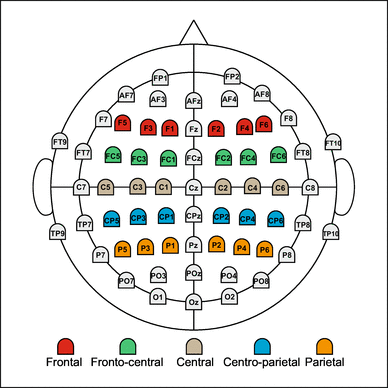

In [56]:
# Electrode placement

img_path = "./images/brain_electrodes.png"
from PIL import Image
Image.open(img_path)

In [57]:
print(powerD[0],'\n', itcD[0])

<AverageTFR | time : [0.000000, 10.000000], freq : [8.000000, 29.000000], nave : 59, channels : 64, ~27.6 MB> 
 <AverageTFR | time : [0.000000, 10.000000], freq : [8.000000, 29.000000], nave : 59, channels : 64, ~27.6 MB>


In [58]:
channelsOfInterest = ['Fp1','Fp2','Fz', 'P1', 'P2', 'Pz']

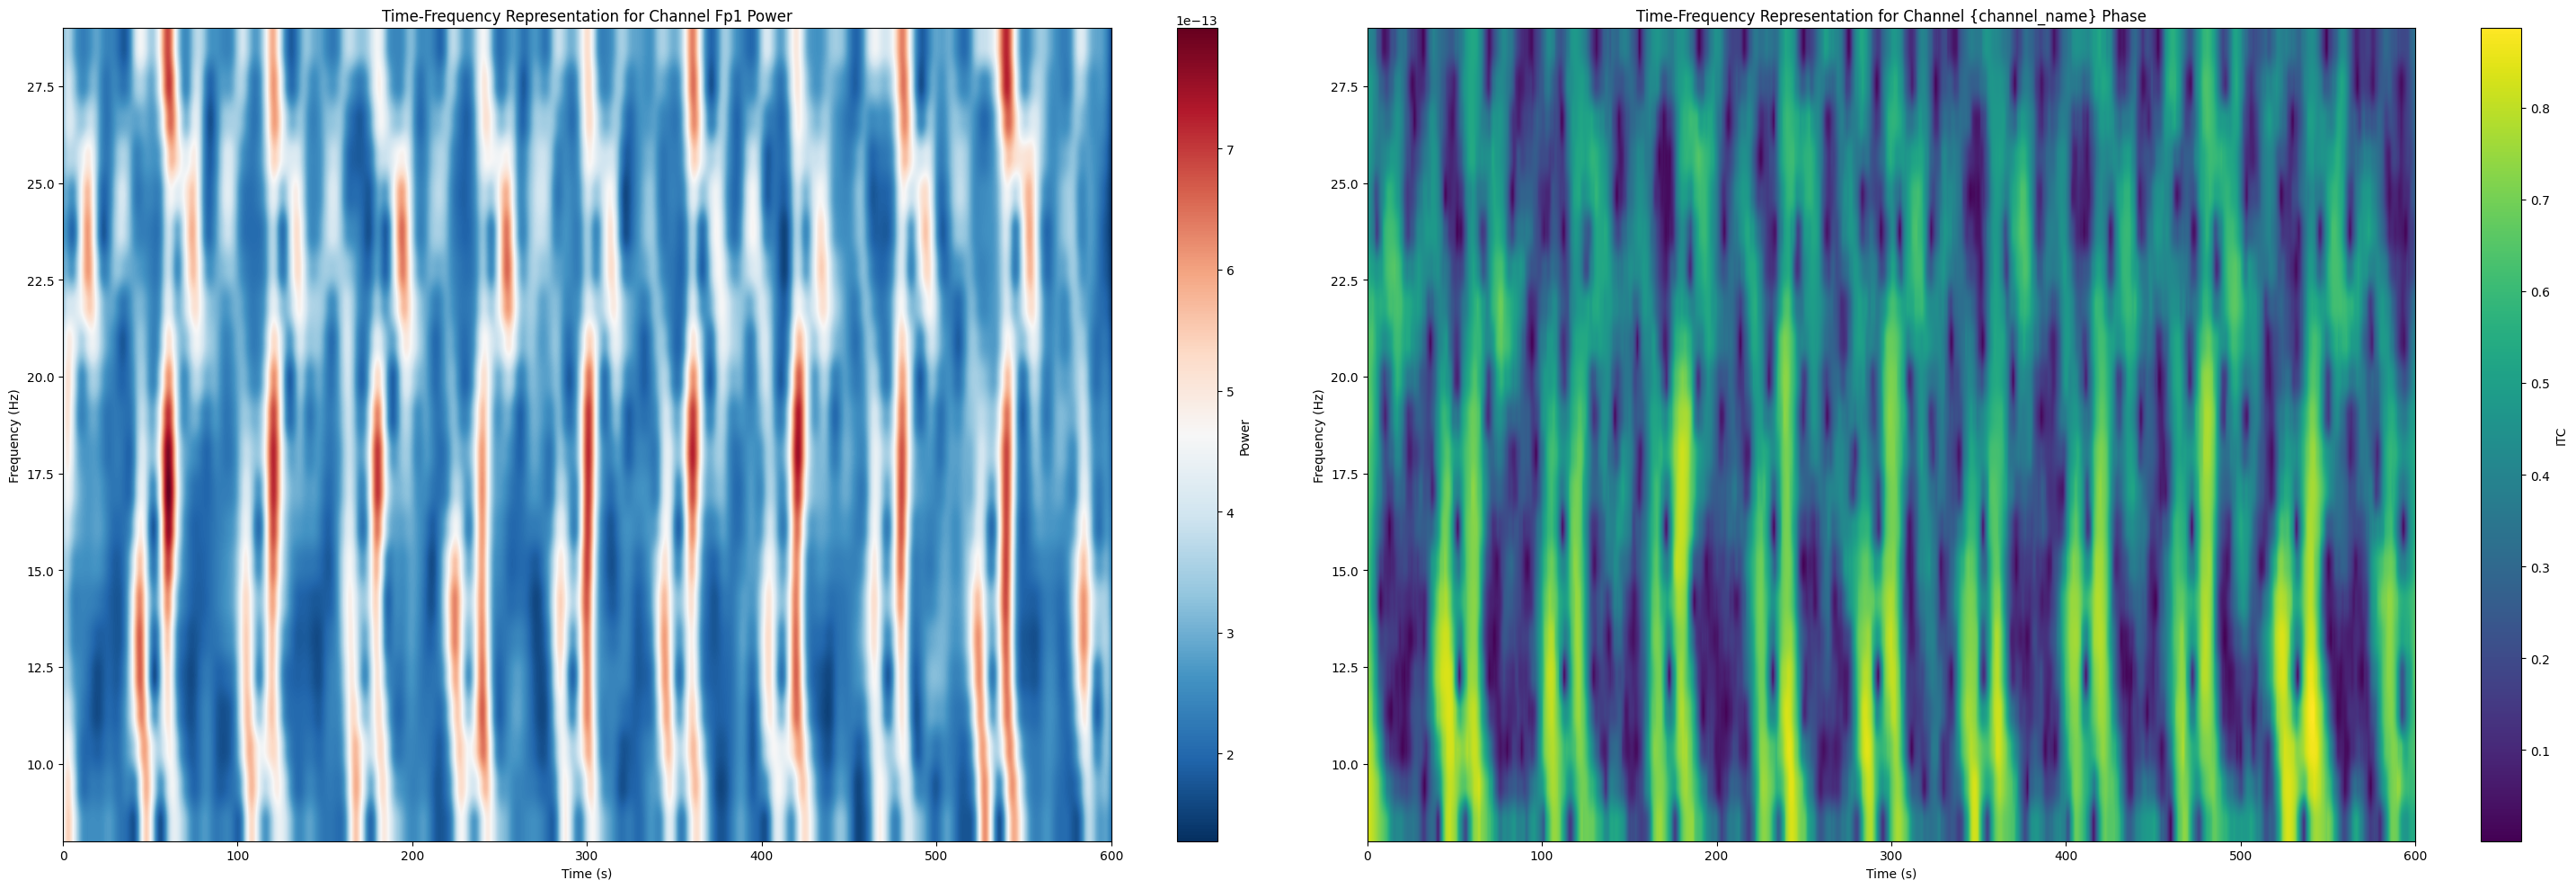

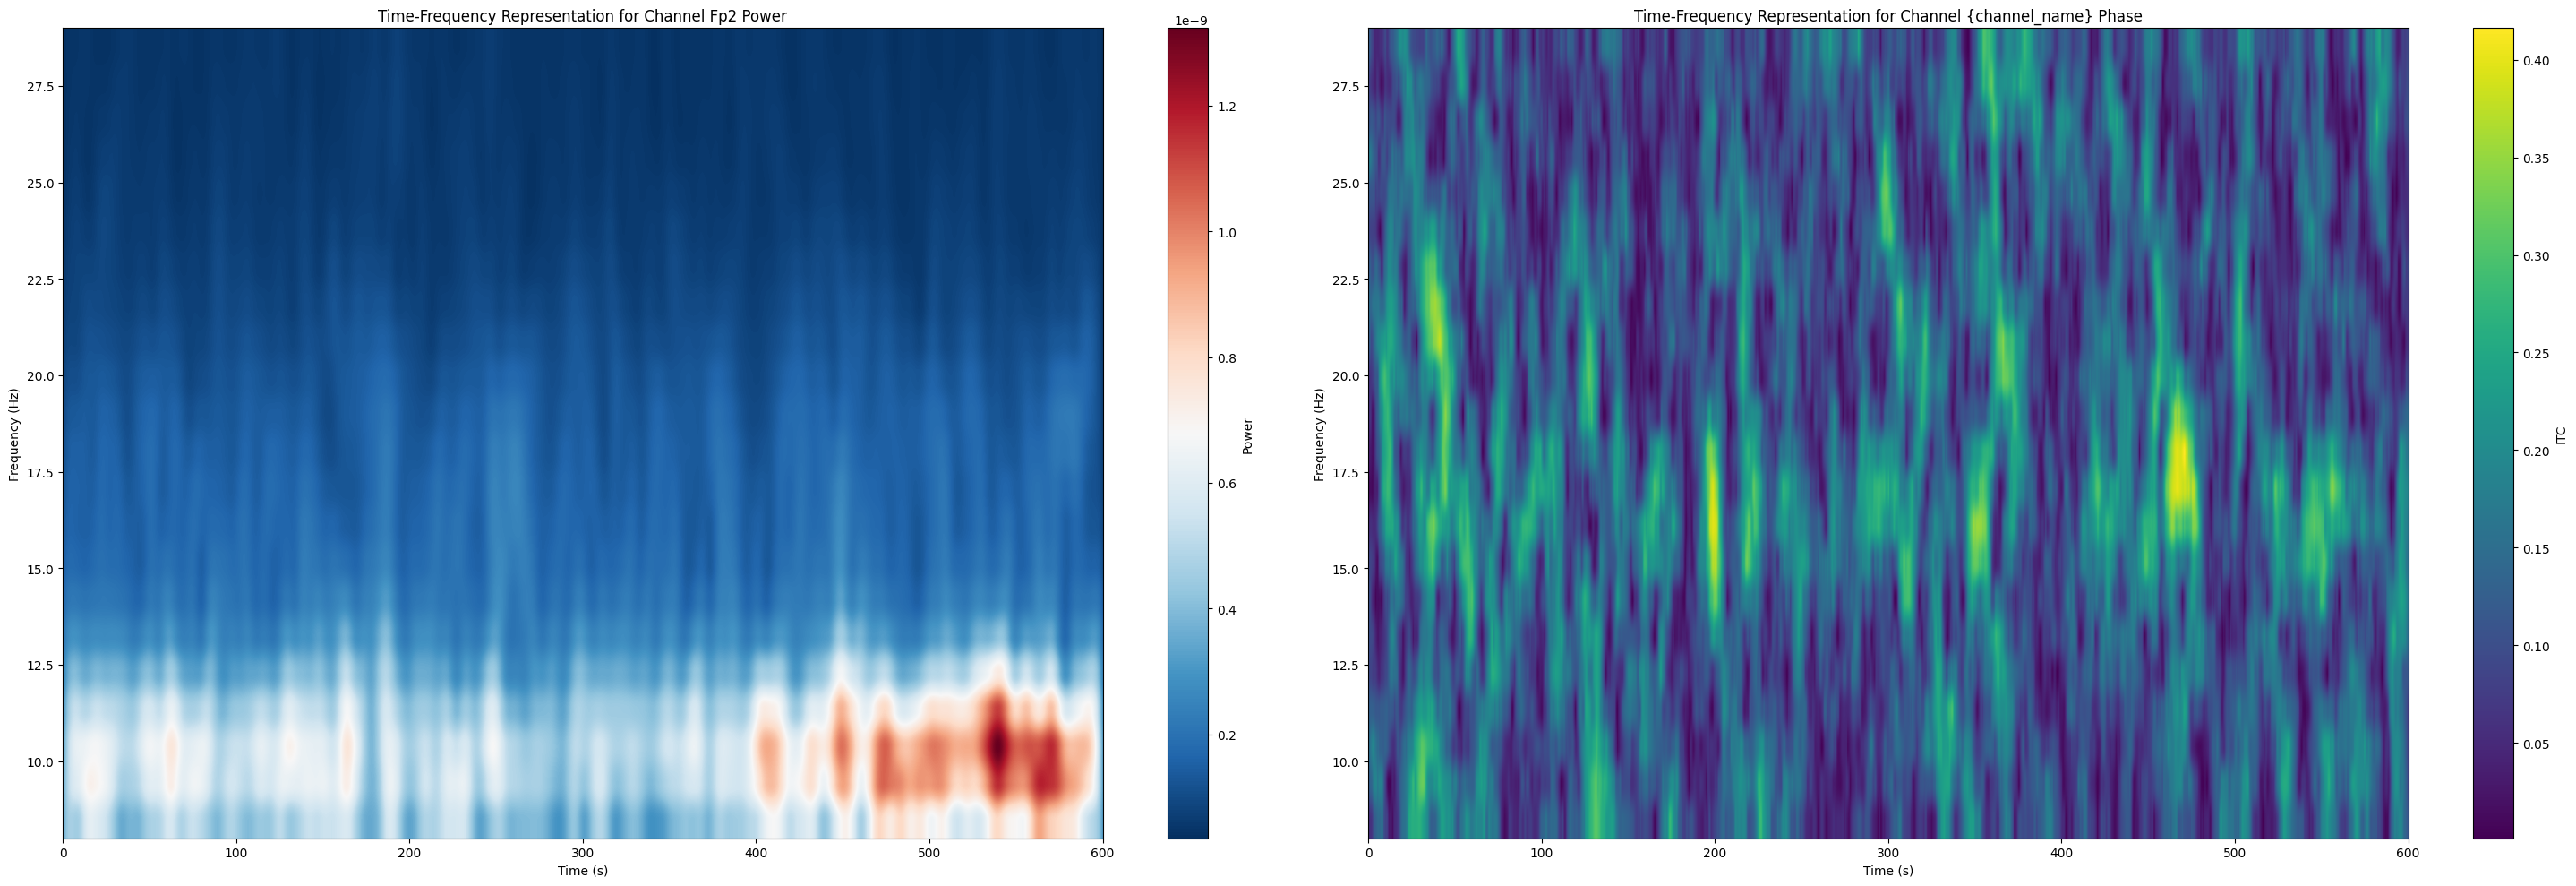

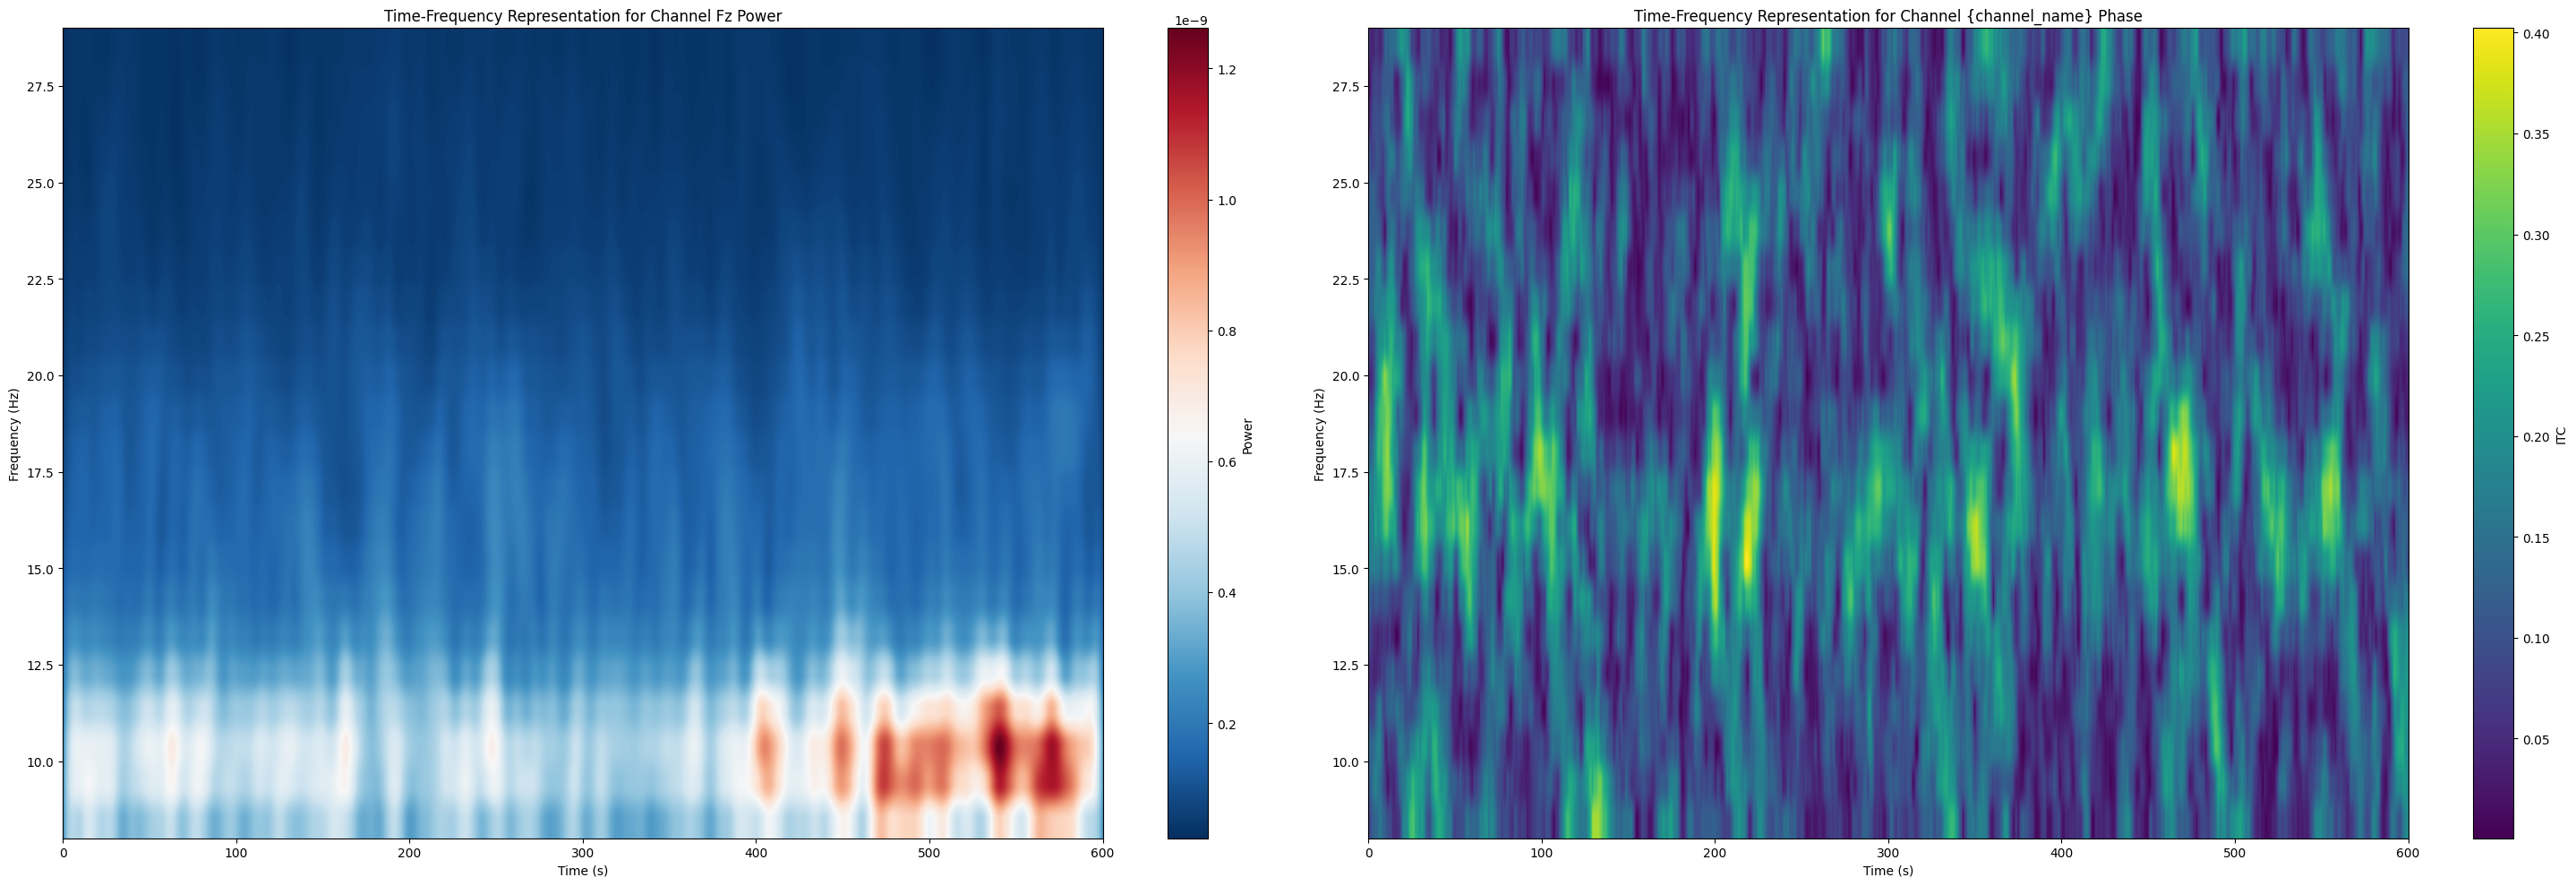

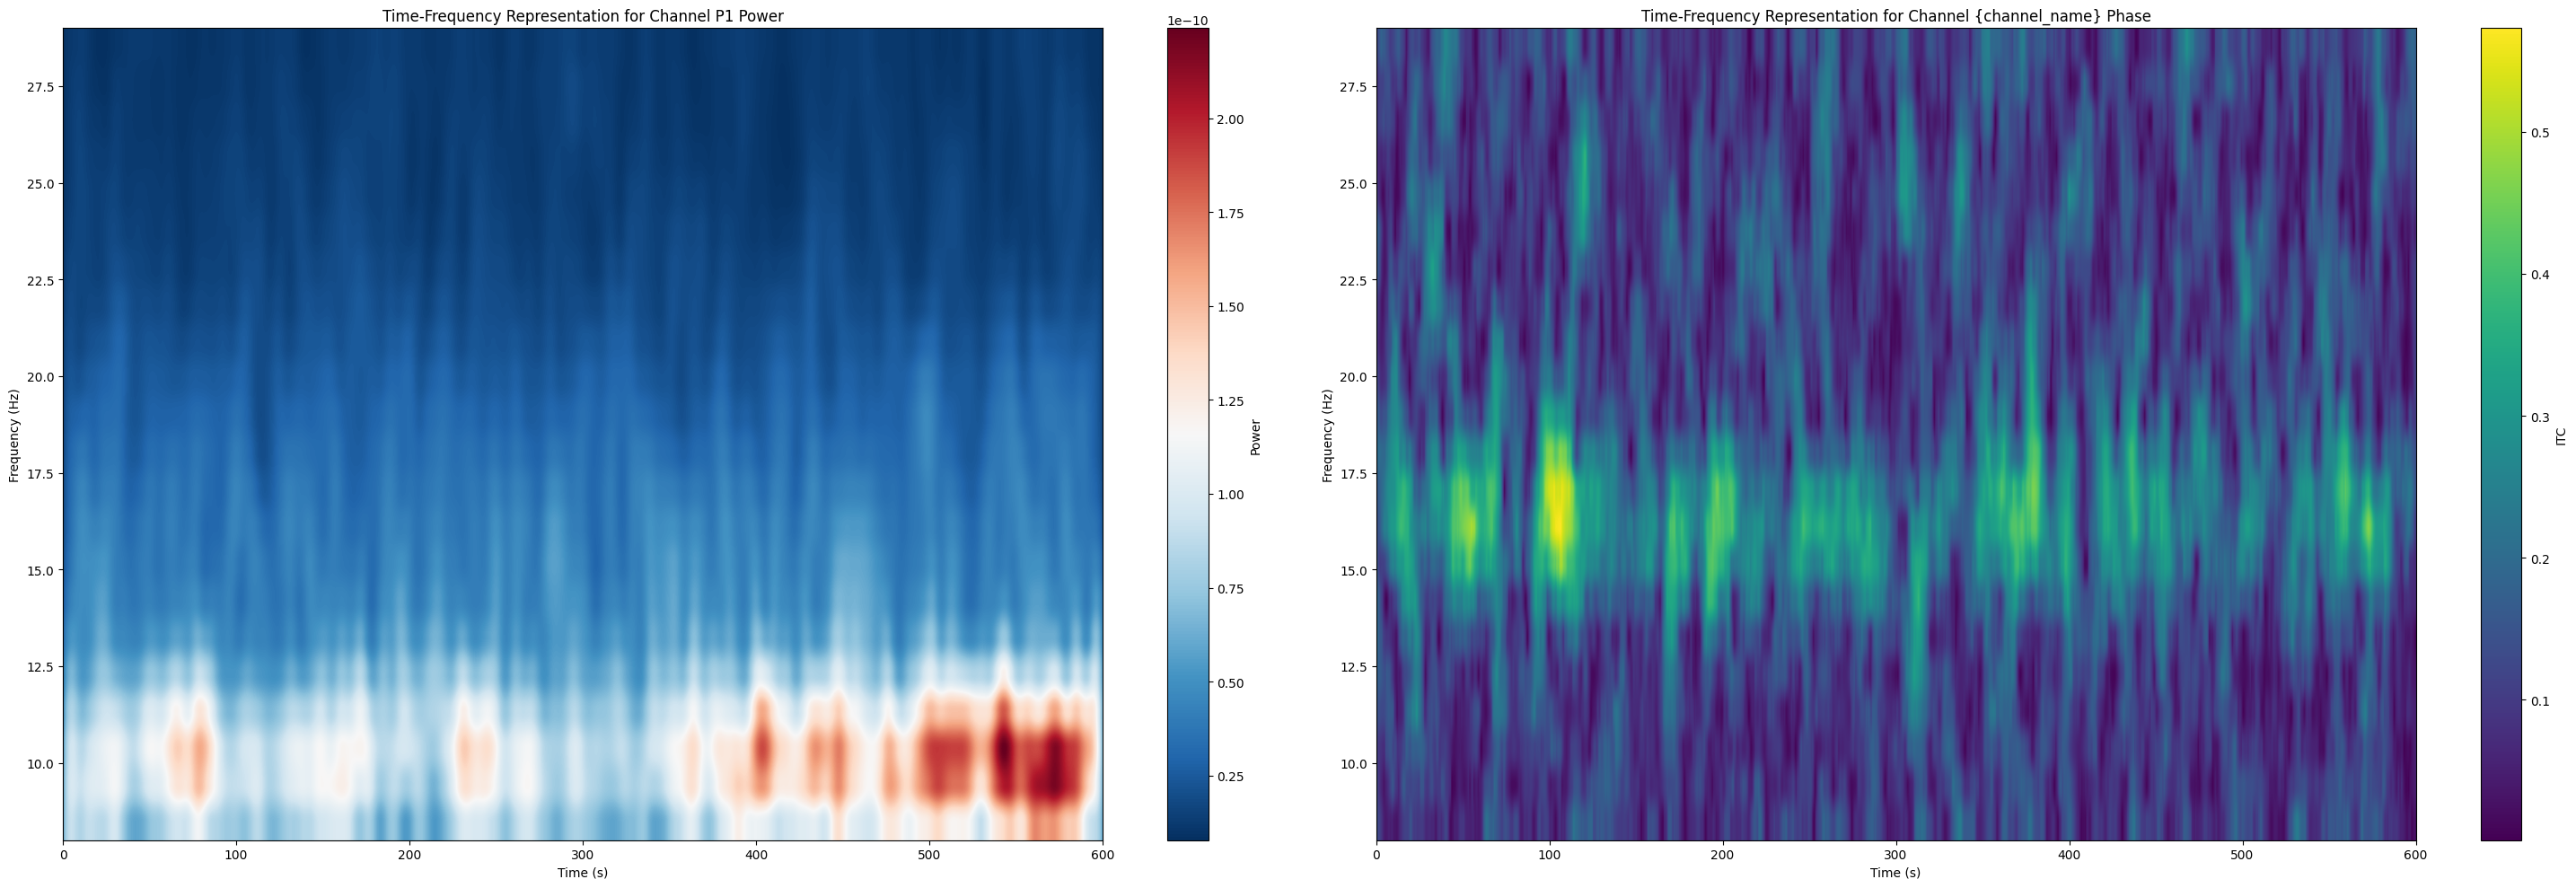

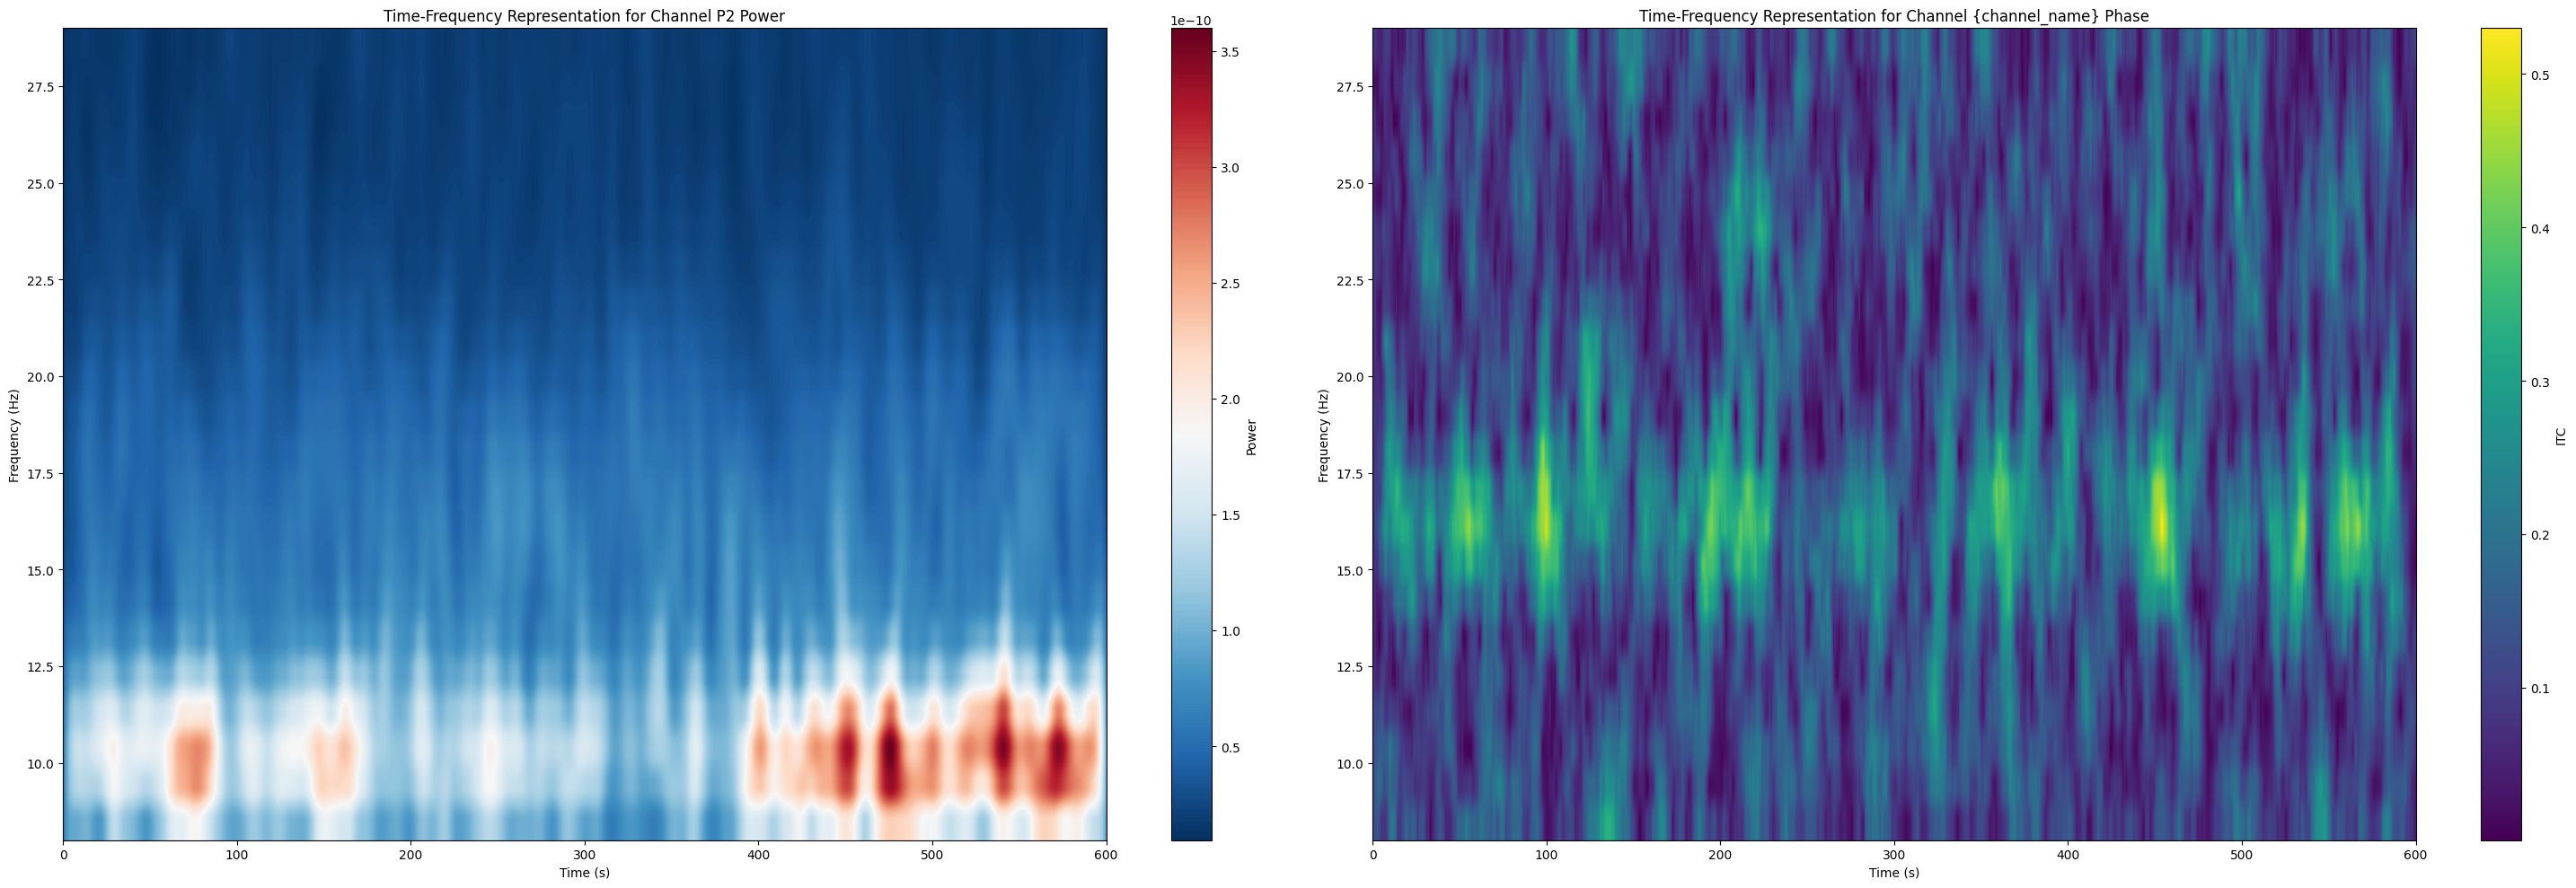

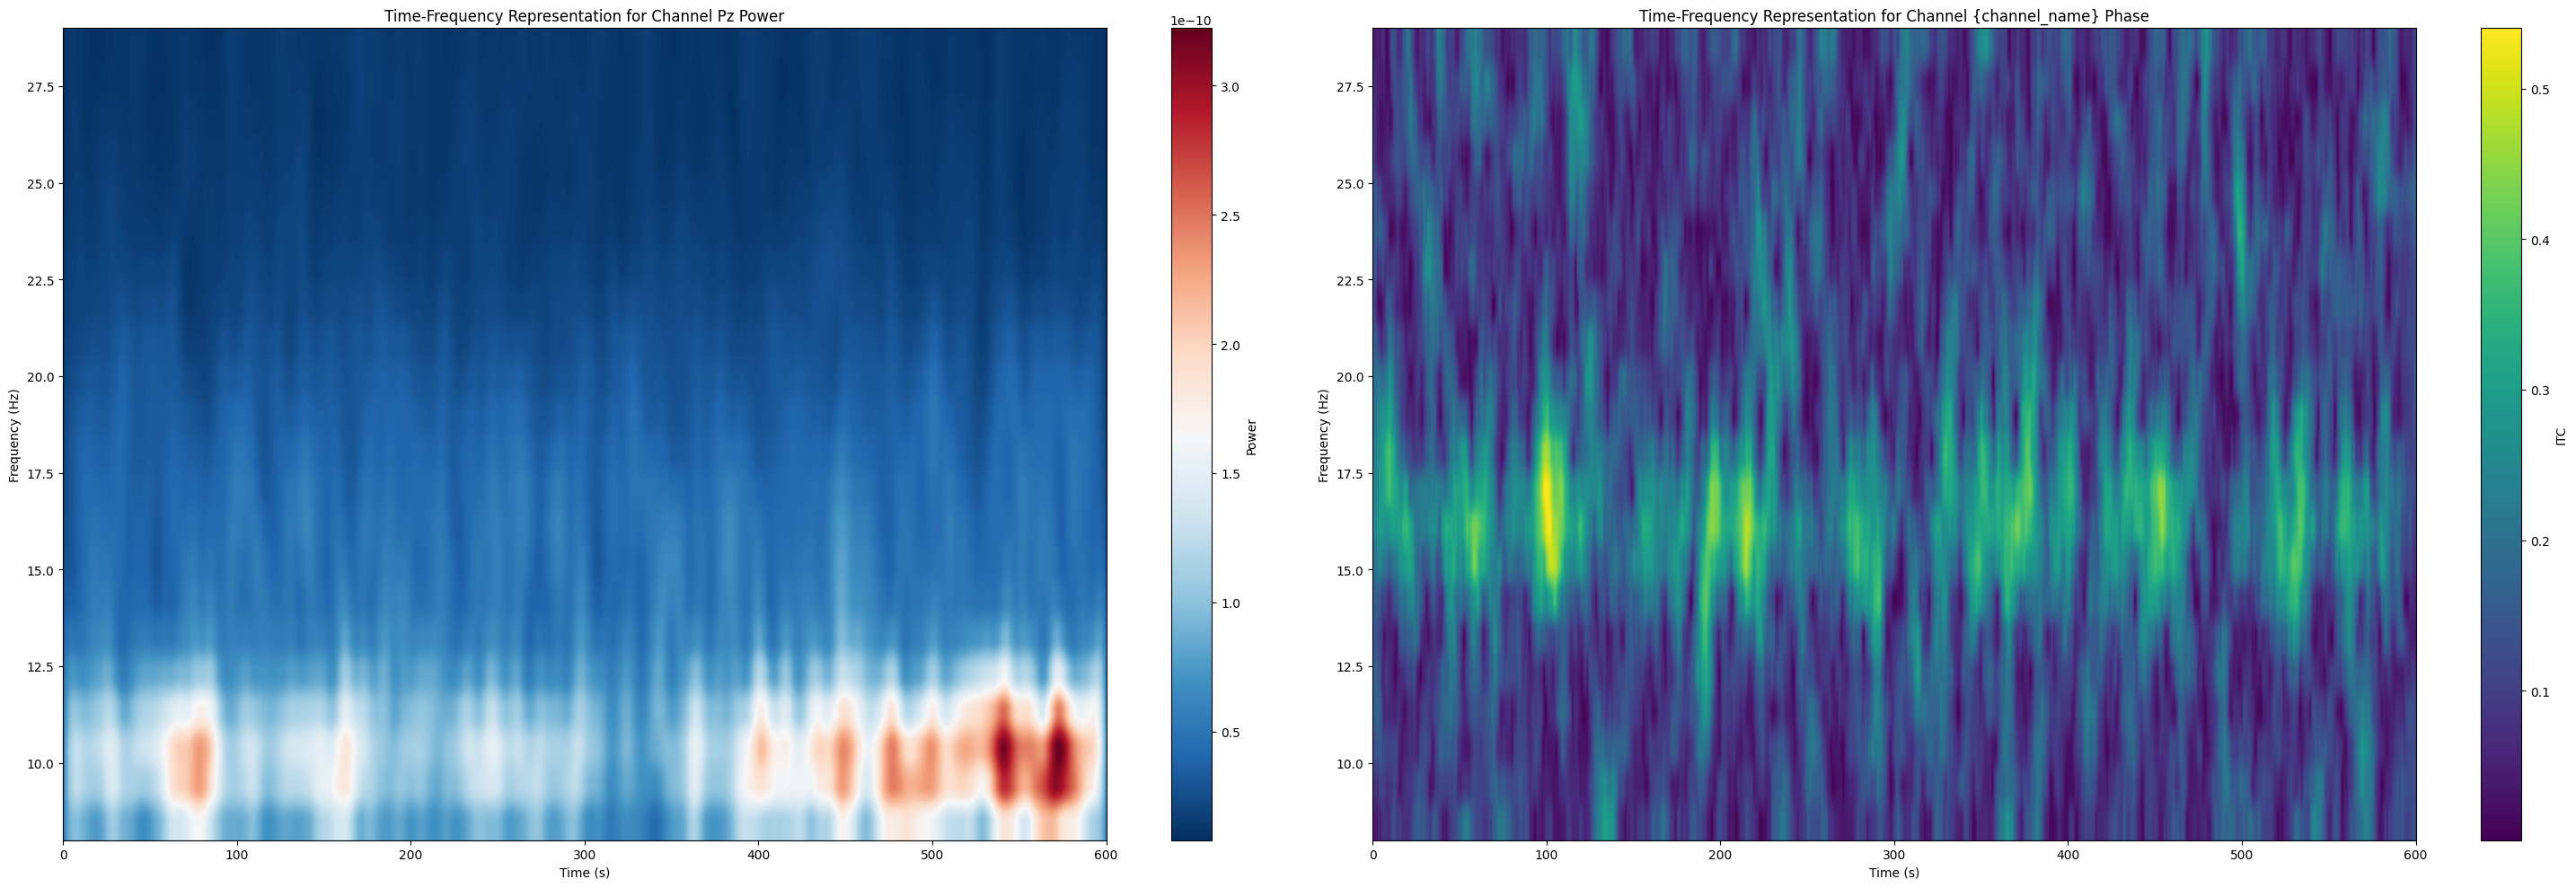

In [59]:
import matplotlib.pyplot as plt

# Select a specific channel and time-frequency data for plotting
for i in range(6):
    channel_name = channelsOfInterest[i]
    channel_index = epoch.ch_names.index(channel_name)
    power_data = powerD[0].data[channel_index] # Select the channel
    # phase_data = phaseD[0][0, channel_index, :, :]
    itc_data = itcD[0].data[channel_index]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

    # Plot the power data
    im1 = ax1.imshow(power_data, aspect='auto', origin='lower',
                     extent=[0, 600, frequencies[0], frequencies[-1]],
                     cmap='RdBu_r')
    fig.colorbar(im1, ax=ax1, label='Power')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_title(f'Time-Frequency Representation for Channel {channel_name} Power')

    # Plot the ITC data
    im2 = ax2.imshow(itc_data, aspect='auto', origin='lower',
                     extent=[0, 600, frequencies[0], frequencies[-1]],
                     cmap='viridis')
    fig.colorbar(im2, ax=ax2, label='ITC')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_title('Time-Frequency Representation for Channel {channel_name} Phase')

    plt.tight_layout()
    plt.show()


In [63]:
print(itcD[12].data.shape)

(64, 22, 2561)


In [64]:
powerD[0].data.shape

(64, 22, 2561)

# Analysing correlation between electrodes based on phase

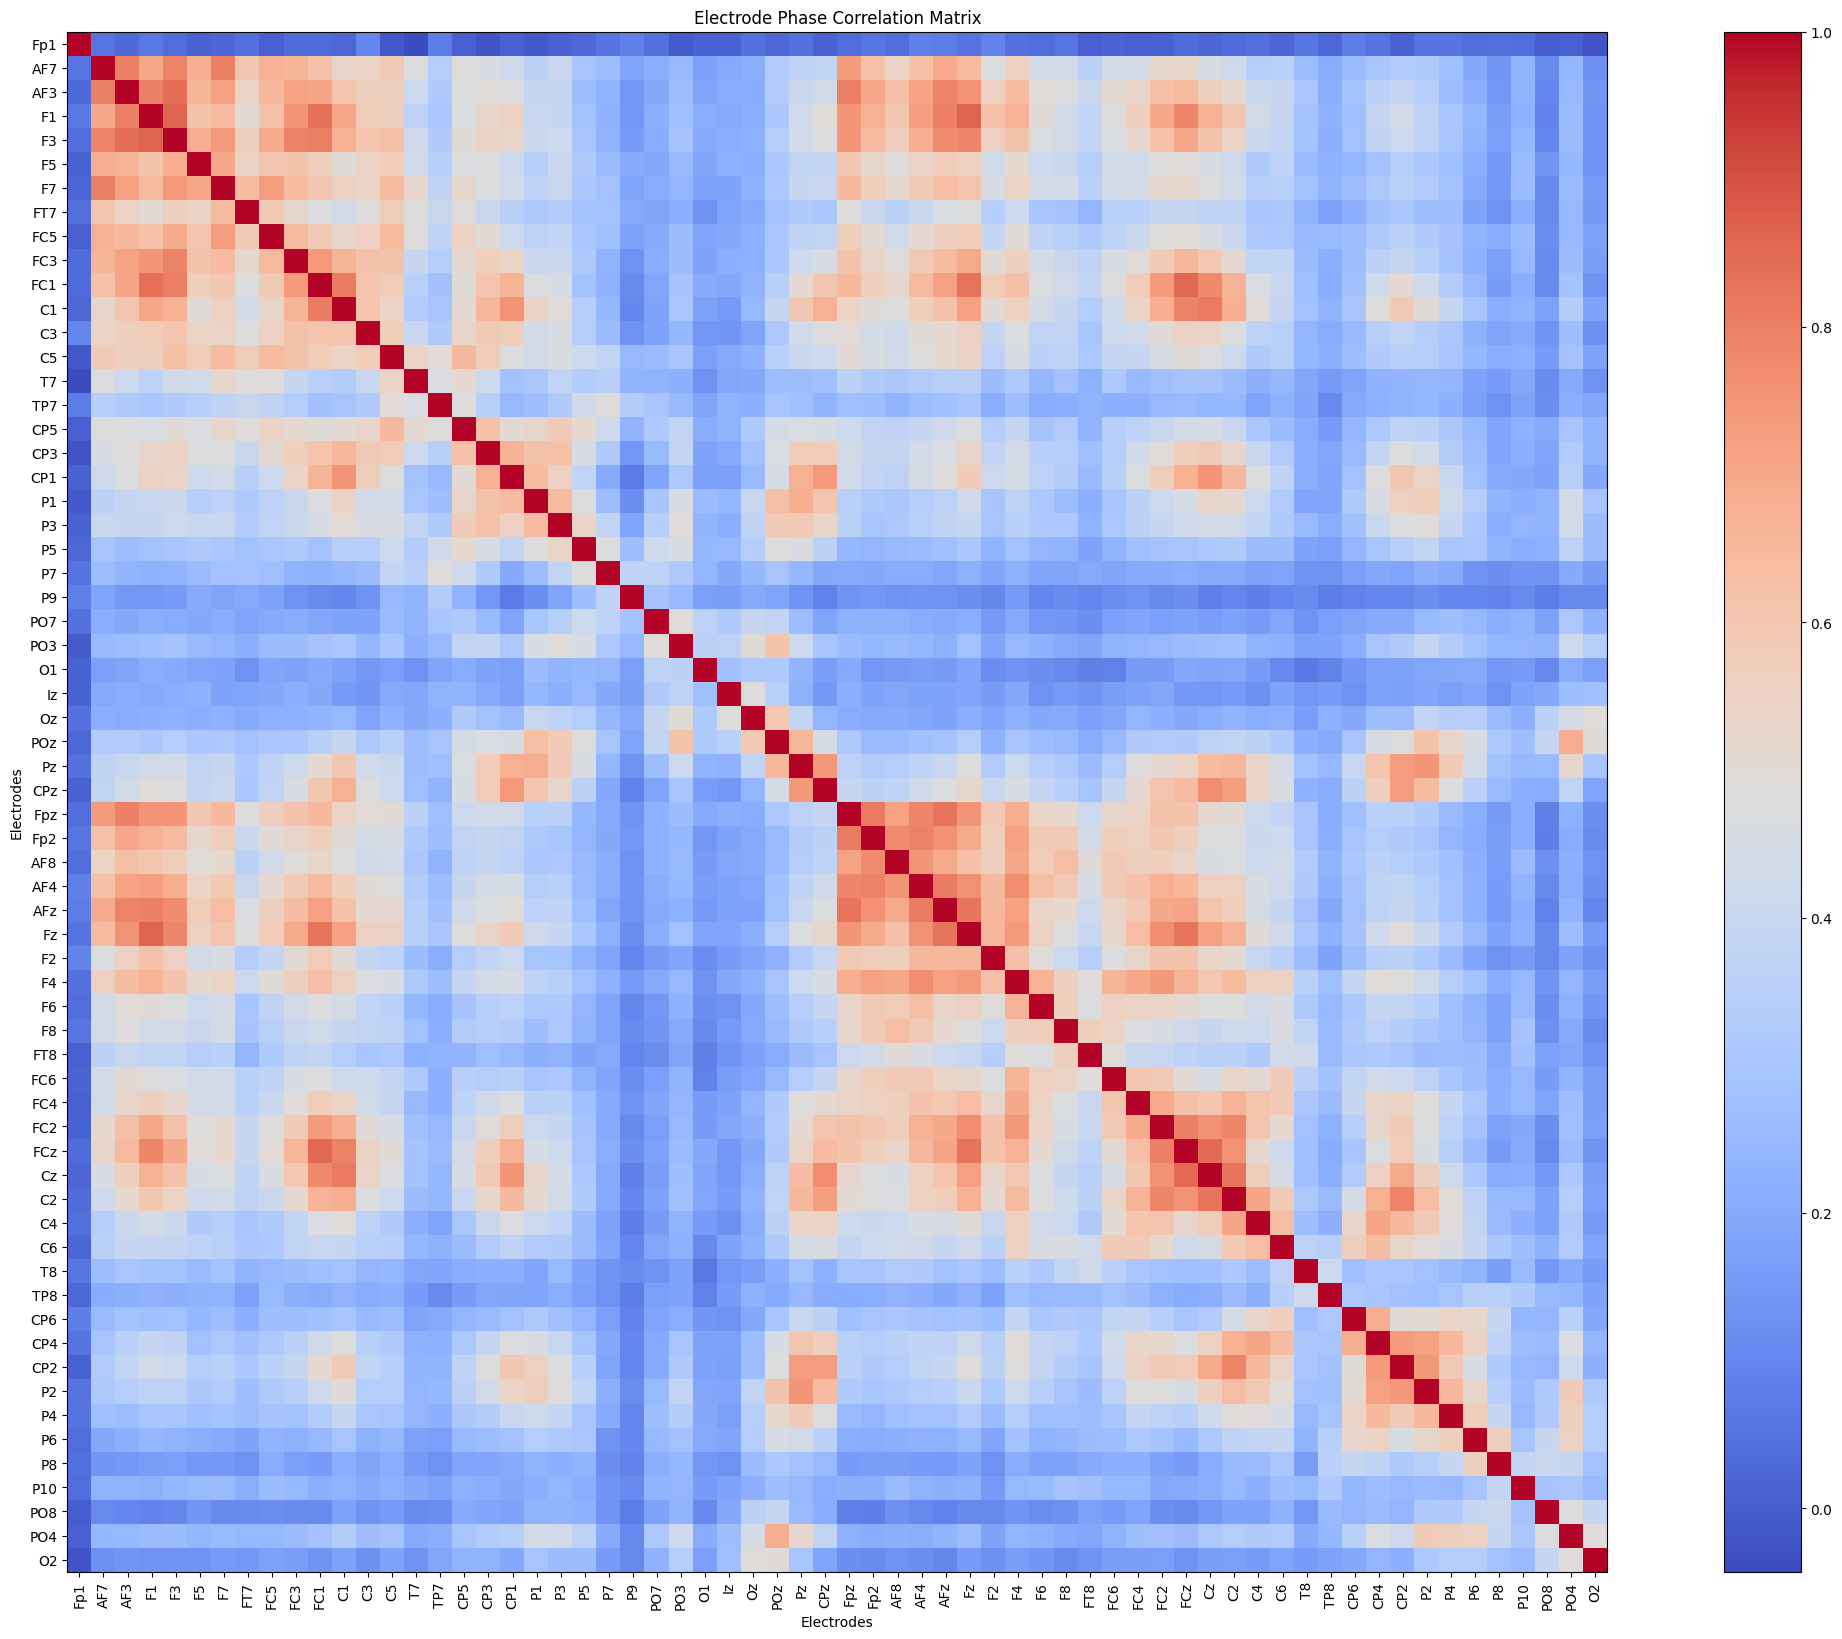

In [66]:
# itcD is data array
data = itcD[0].data  # Shape: (64, 22, 2561)

# Reshape data to (electrodes, features) where features are frequency-time combinations
reshaped_data = data.reshape(data.shape[0], -1)

# Compute the correlation matrix
correlation_matrix = np.corrcoef(reshaped_data)

# Define electrode names
channel_names = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

# Plot the correlation matrix with electrode names
plt.figure(figsize=(30, 20))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Electrode Phase Correlation Matrix')
plt.xticks(np.arange(len(channel_names)), channel_names, rotation=90)
plt.yticks(np.arange(len(channel_names)), channel_names)
plt.xlabel('Electrodes')
plt.ylabel('Electrodes')
plt.show()


# Analysing different Subjects

In [67]:
files

[PosixPath('../sub-013/eeg/sub-013_task-med1breath_eeg.bdf'),
 PosixPath('../sub-013/eeg/sub-013_task-med2_eeg.bdf'),
 PosixPath('../sub-013/eeg/sub-013_task-think1_eeg.bdf'),
 PosixPath('../sub-013/eeg/sub-013_task-think2_eeg.bdf'),
 PosixPath('../sub-026/eeg/sub-026_task-med1breath_eeg.bdf'),
 PosixPath('../sub-026/eeg/sub-026_task-med2_eeg.bdf'),
 PosixPath('../sub-026/eeg/sub-026_task-think1_eeg.bdf'),
 PosixPath('../sub-026/eeg/sub-026_task-think2_eeg.bdf'),
 PosixPath('../sub-062/eeg/sub-062_task-think1_eeg.bdf'),
 PosixPath('../sub-062/eeg/sub-062_task-med1breath_eeg.bdf'),
 PosixPath('../sub-062/eeg/sub-062_task-med2_eeg.bdf'),
 PosixPath('../sub-062/eeg/sub-062_task-think2_eeg.bdf'),
 PosixPath('../sub-080/eeg/sub-080_task-think2_eeg.bdf'),
 PosixPath('../sub-080/eeg/sub-080_task-med1breath_eeg.bdf'),
 PosixPath('../sub-080/eeg/sub-080_task-think1_eeg.bdf'),
 PosixPath('../sub-080/eeg/sub-080_task-med2_eeg.bdf')]

In [88]:
for i in range(len(files)):
    if 'think2' in str(files[i]):
        print(i)

3
7
11
12


In [68]:
# HTR, CTR, VIP, SNY

index_list1 = [0,4,9,13] # med1breath
index_list2 = [1,5,10,15] # med2
index_list3 = [2,6,8,14] # think1
index_list4 = [3,7,11,12] # think2

## Correlation of phase values between different electrodes of same subject

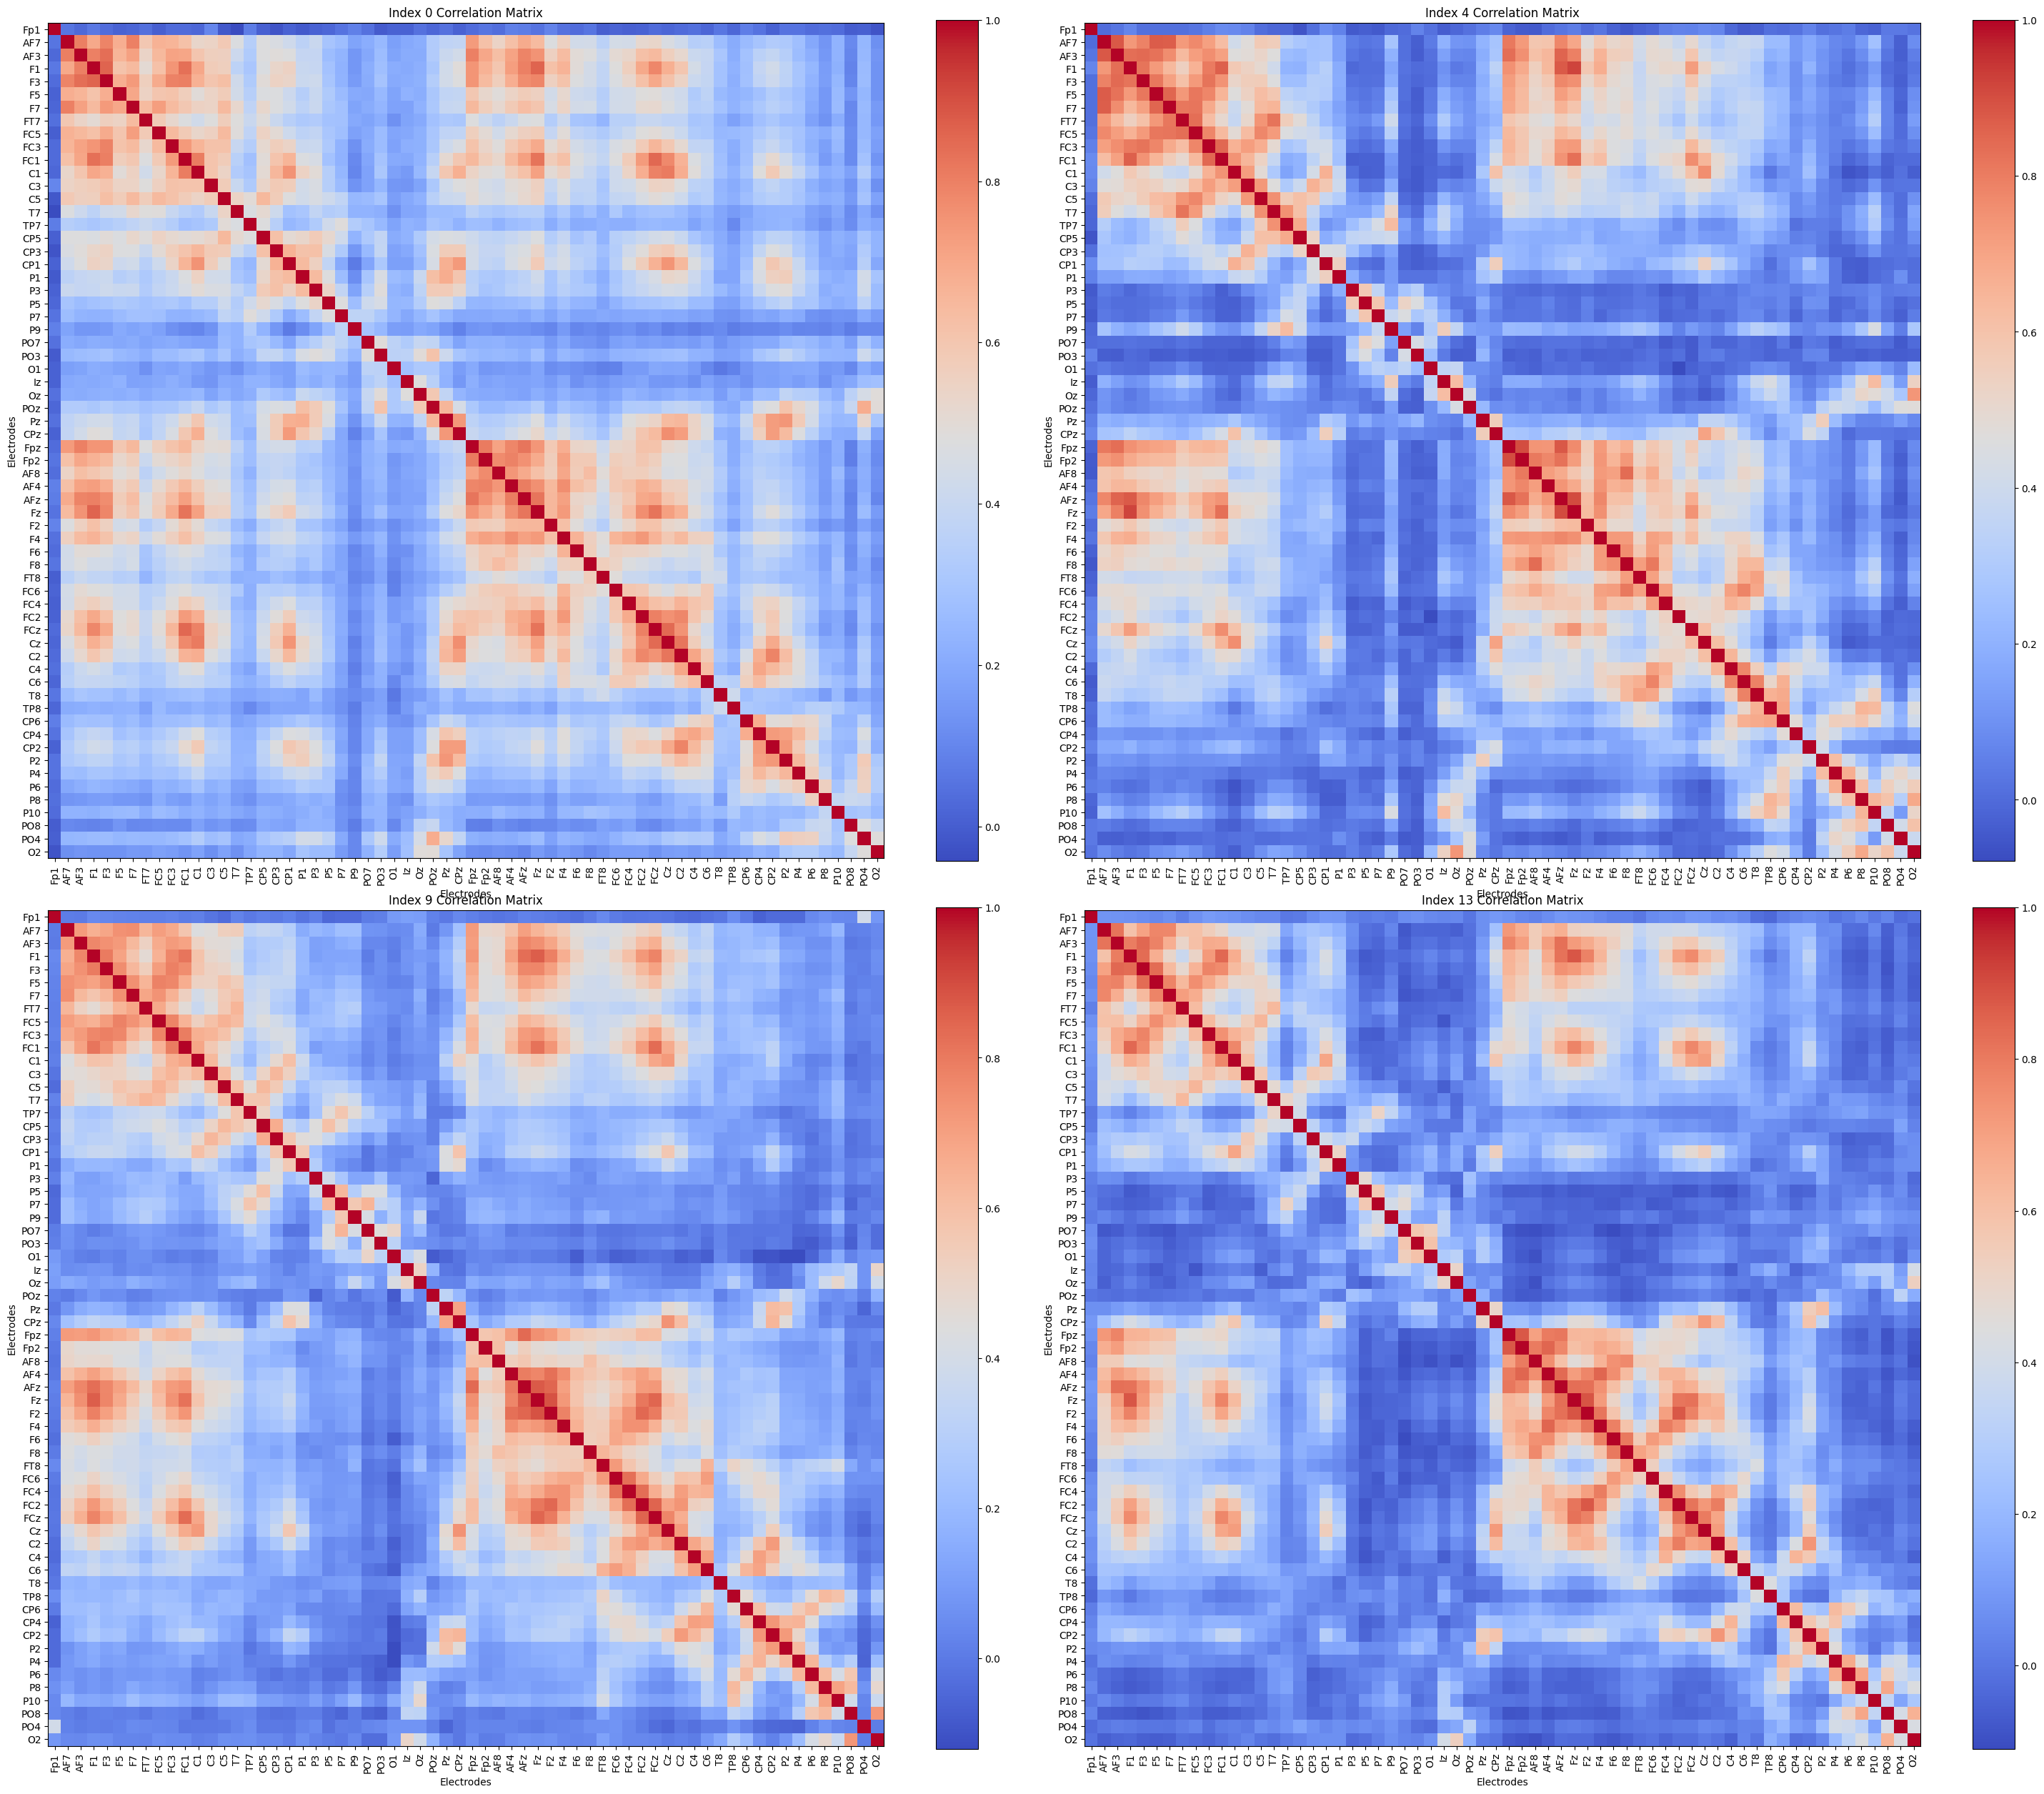

In [69]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 25))

# Loop over the indices in index_list1
for i, ax in zip(index_list1, axs.flatten()):
    # Assuming itcD is your data array
    data = itcD[i].data  # Shape: (64, 22, 2561)

    # Reshape data to (electrodes, features) where features are frequency-time combinations
    reshaped_data = data.reshape(data.shape[0], -1)

    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(reshaped_data)

    # Plot the correlation matrix in the current subplot
    im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    ax.set_title(f'Index {i} Correlation Matrix')
    ax.set_xticks(np.arange(len(channel_names)))
    ax.set_yticks(np.arange(len(channel_names)))
    ax.set_xticklabels(channel_names, rotation=90)
    ax.set_yticklabels(channel_names)
    ax.set_xlabel('Electrodes')
    ax.set_ylabel('Electrodes')
    fig.colorbar(im, ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


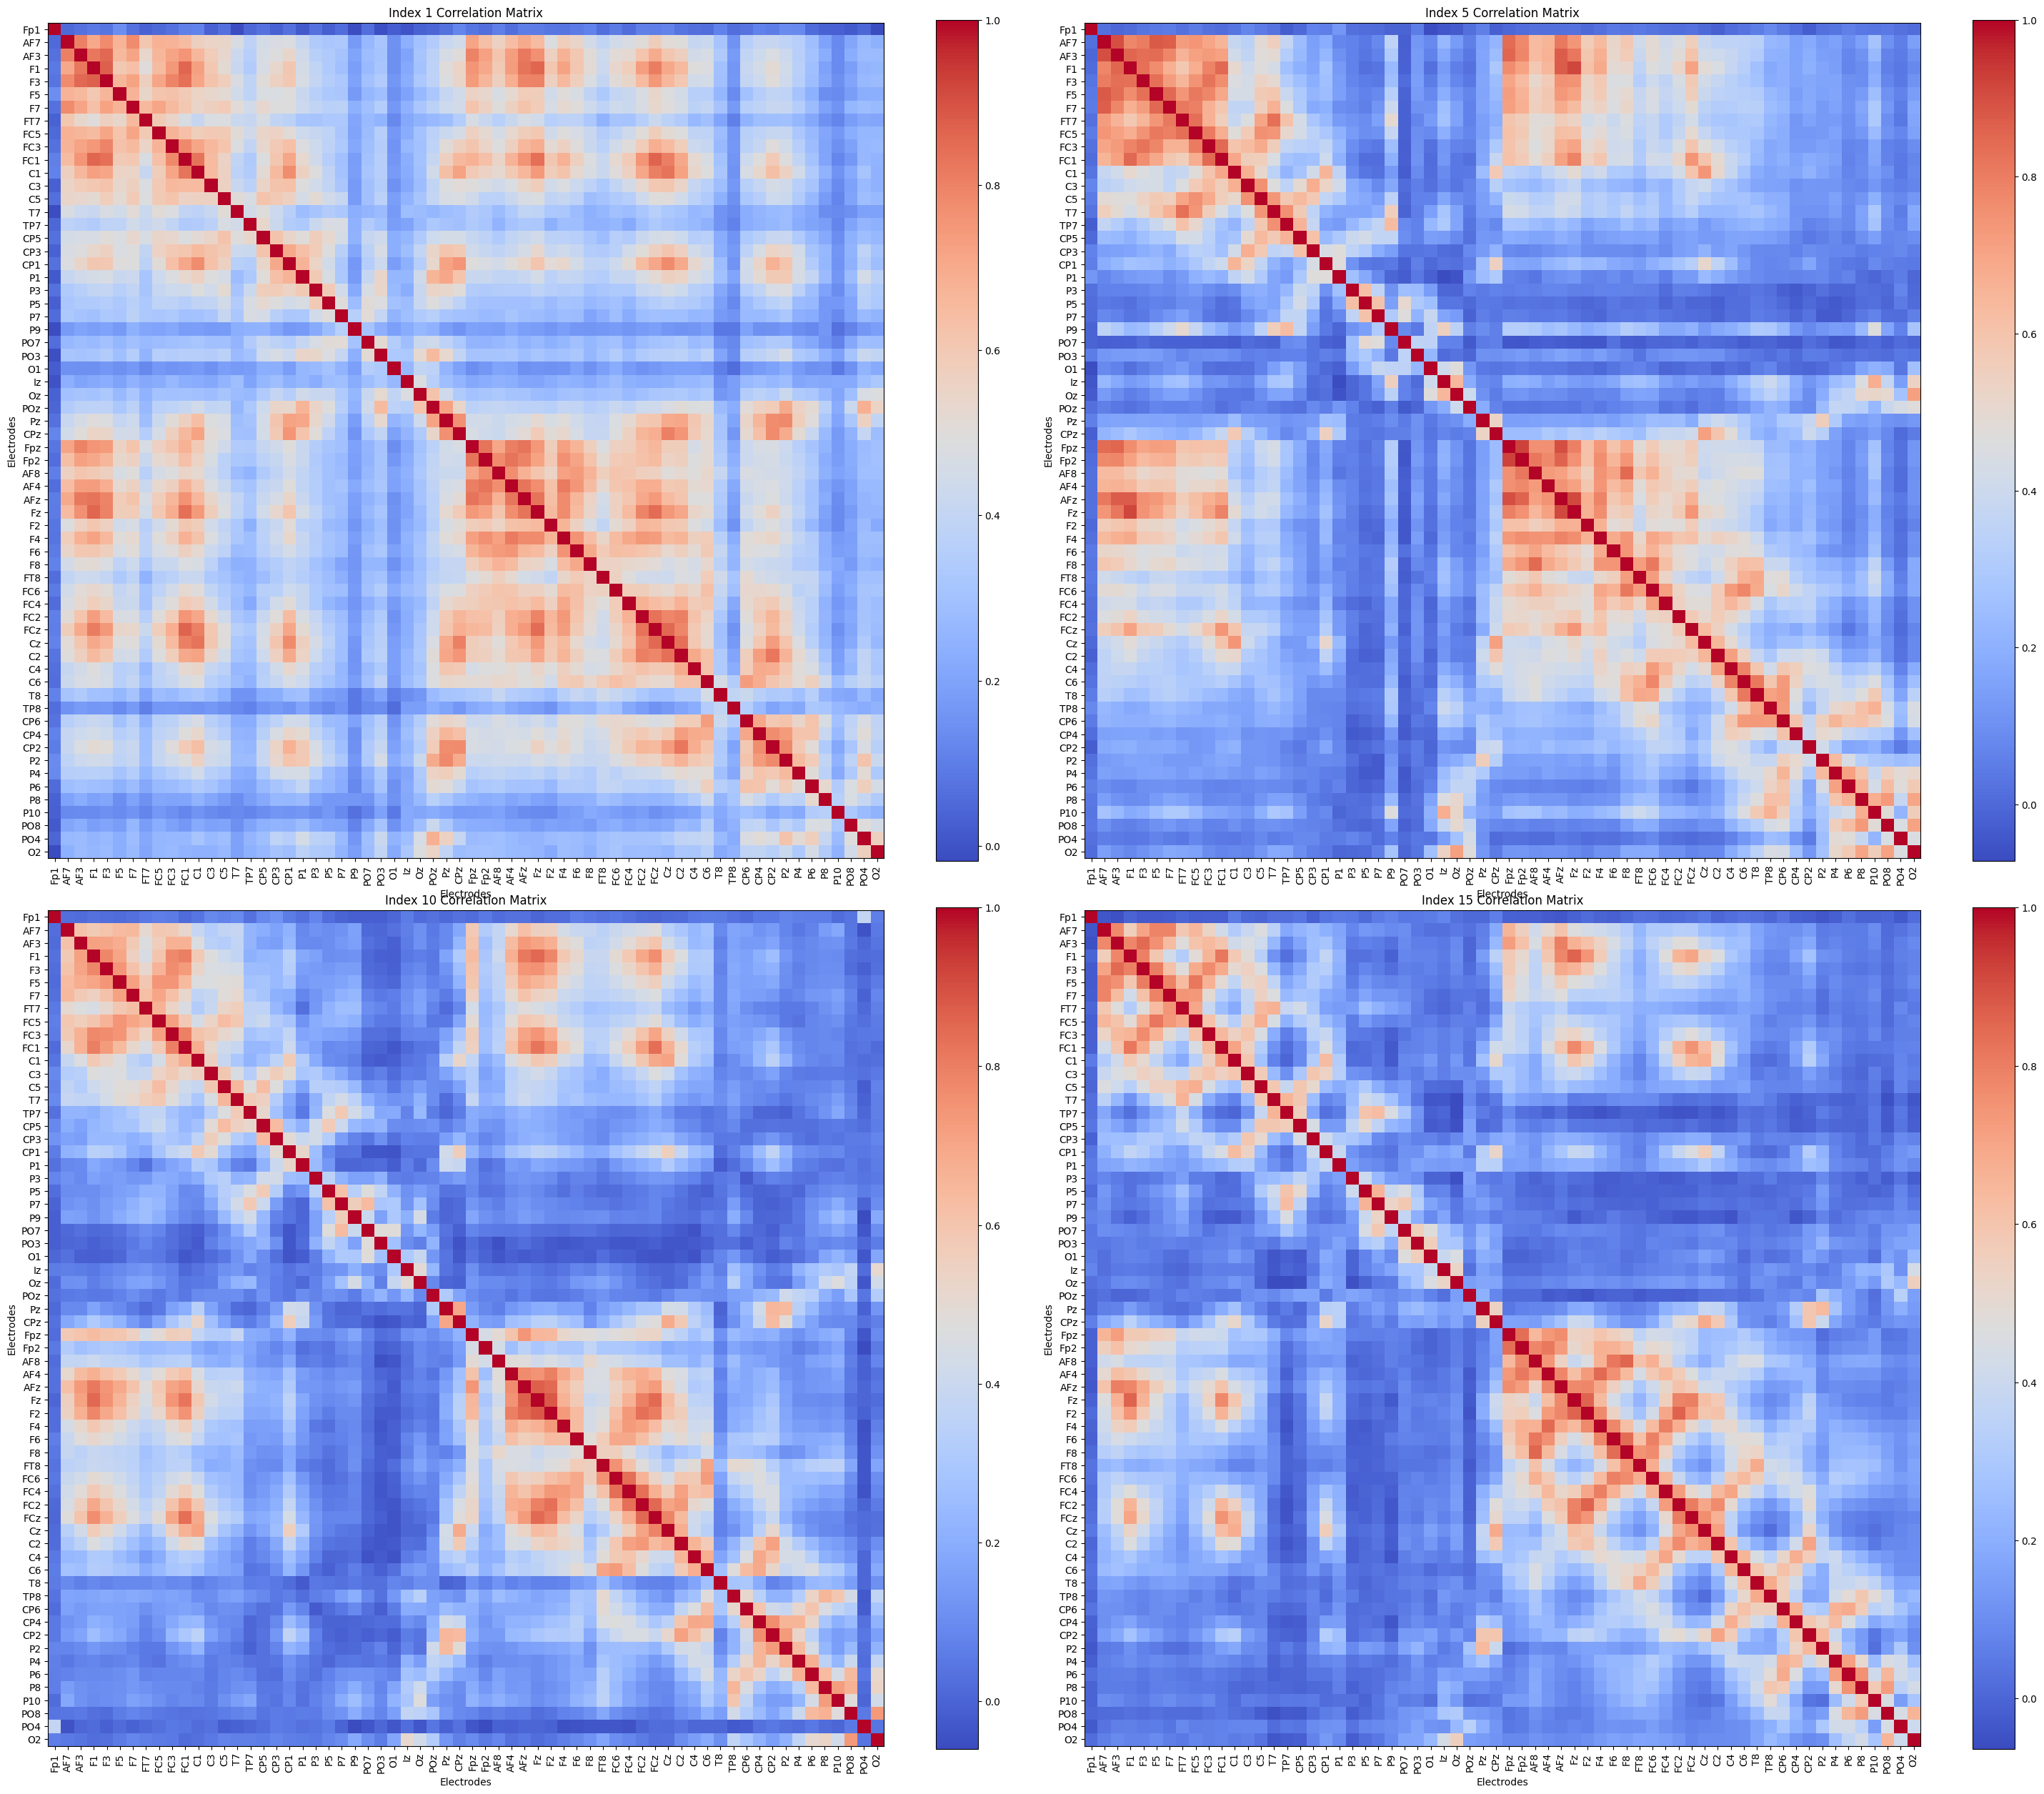

In [70]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 25))

# Loop over the indices in index_list1
for i, ax in zip(index_list2, axs.flatten()):
    # Assuming itcD is your data array
    data = itcD[i].data  # Shape: (64, 22, 2561)

    # Reshape data to (electrodes, features) where features are frequency-time combinations
    reshaped_data = data.reshape(data.shape[0], -1)

    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(reshaped_data)

    # Plot the correlation matrix in the current subplot
    im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    ax.set_title(f'Index {i} Correlation Matrix')
    ax.set_xticks(np.arange(len(channel_names)))
    ax.set_yticks(np.arange(len(channel_names)))
    ax.set_xticklabels(channel_names, rotation=90)
    ax.set_yticklabels(channel_names)
    ax.set_xlabel('Electrodes')
    ax.set_ylabel('Electrodes')
    fig.colorbar(im, ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


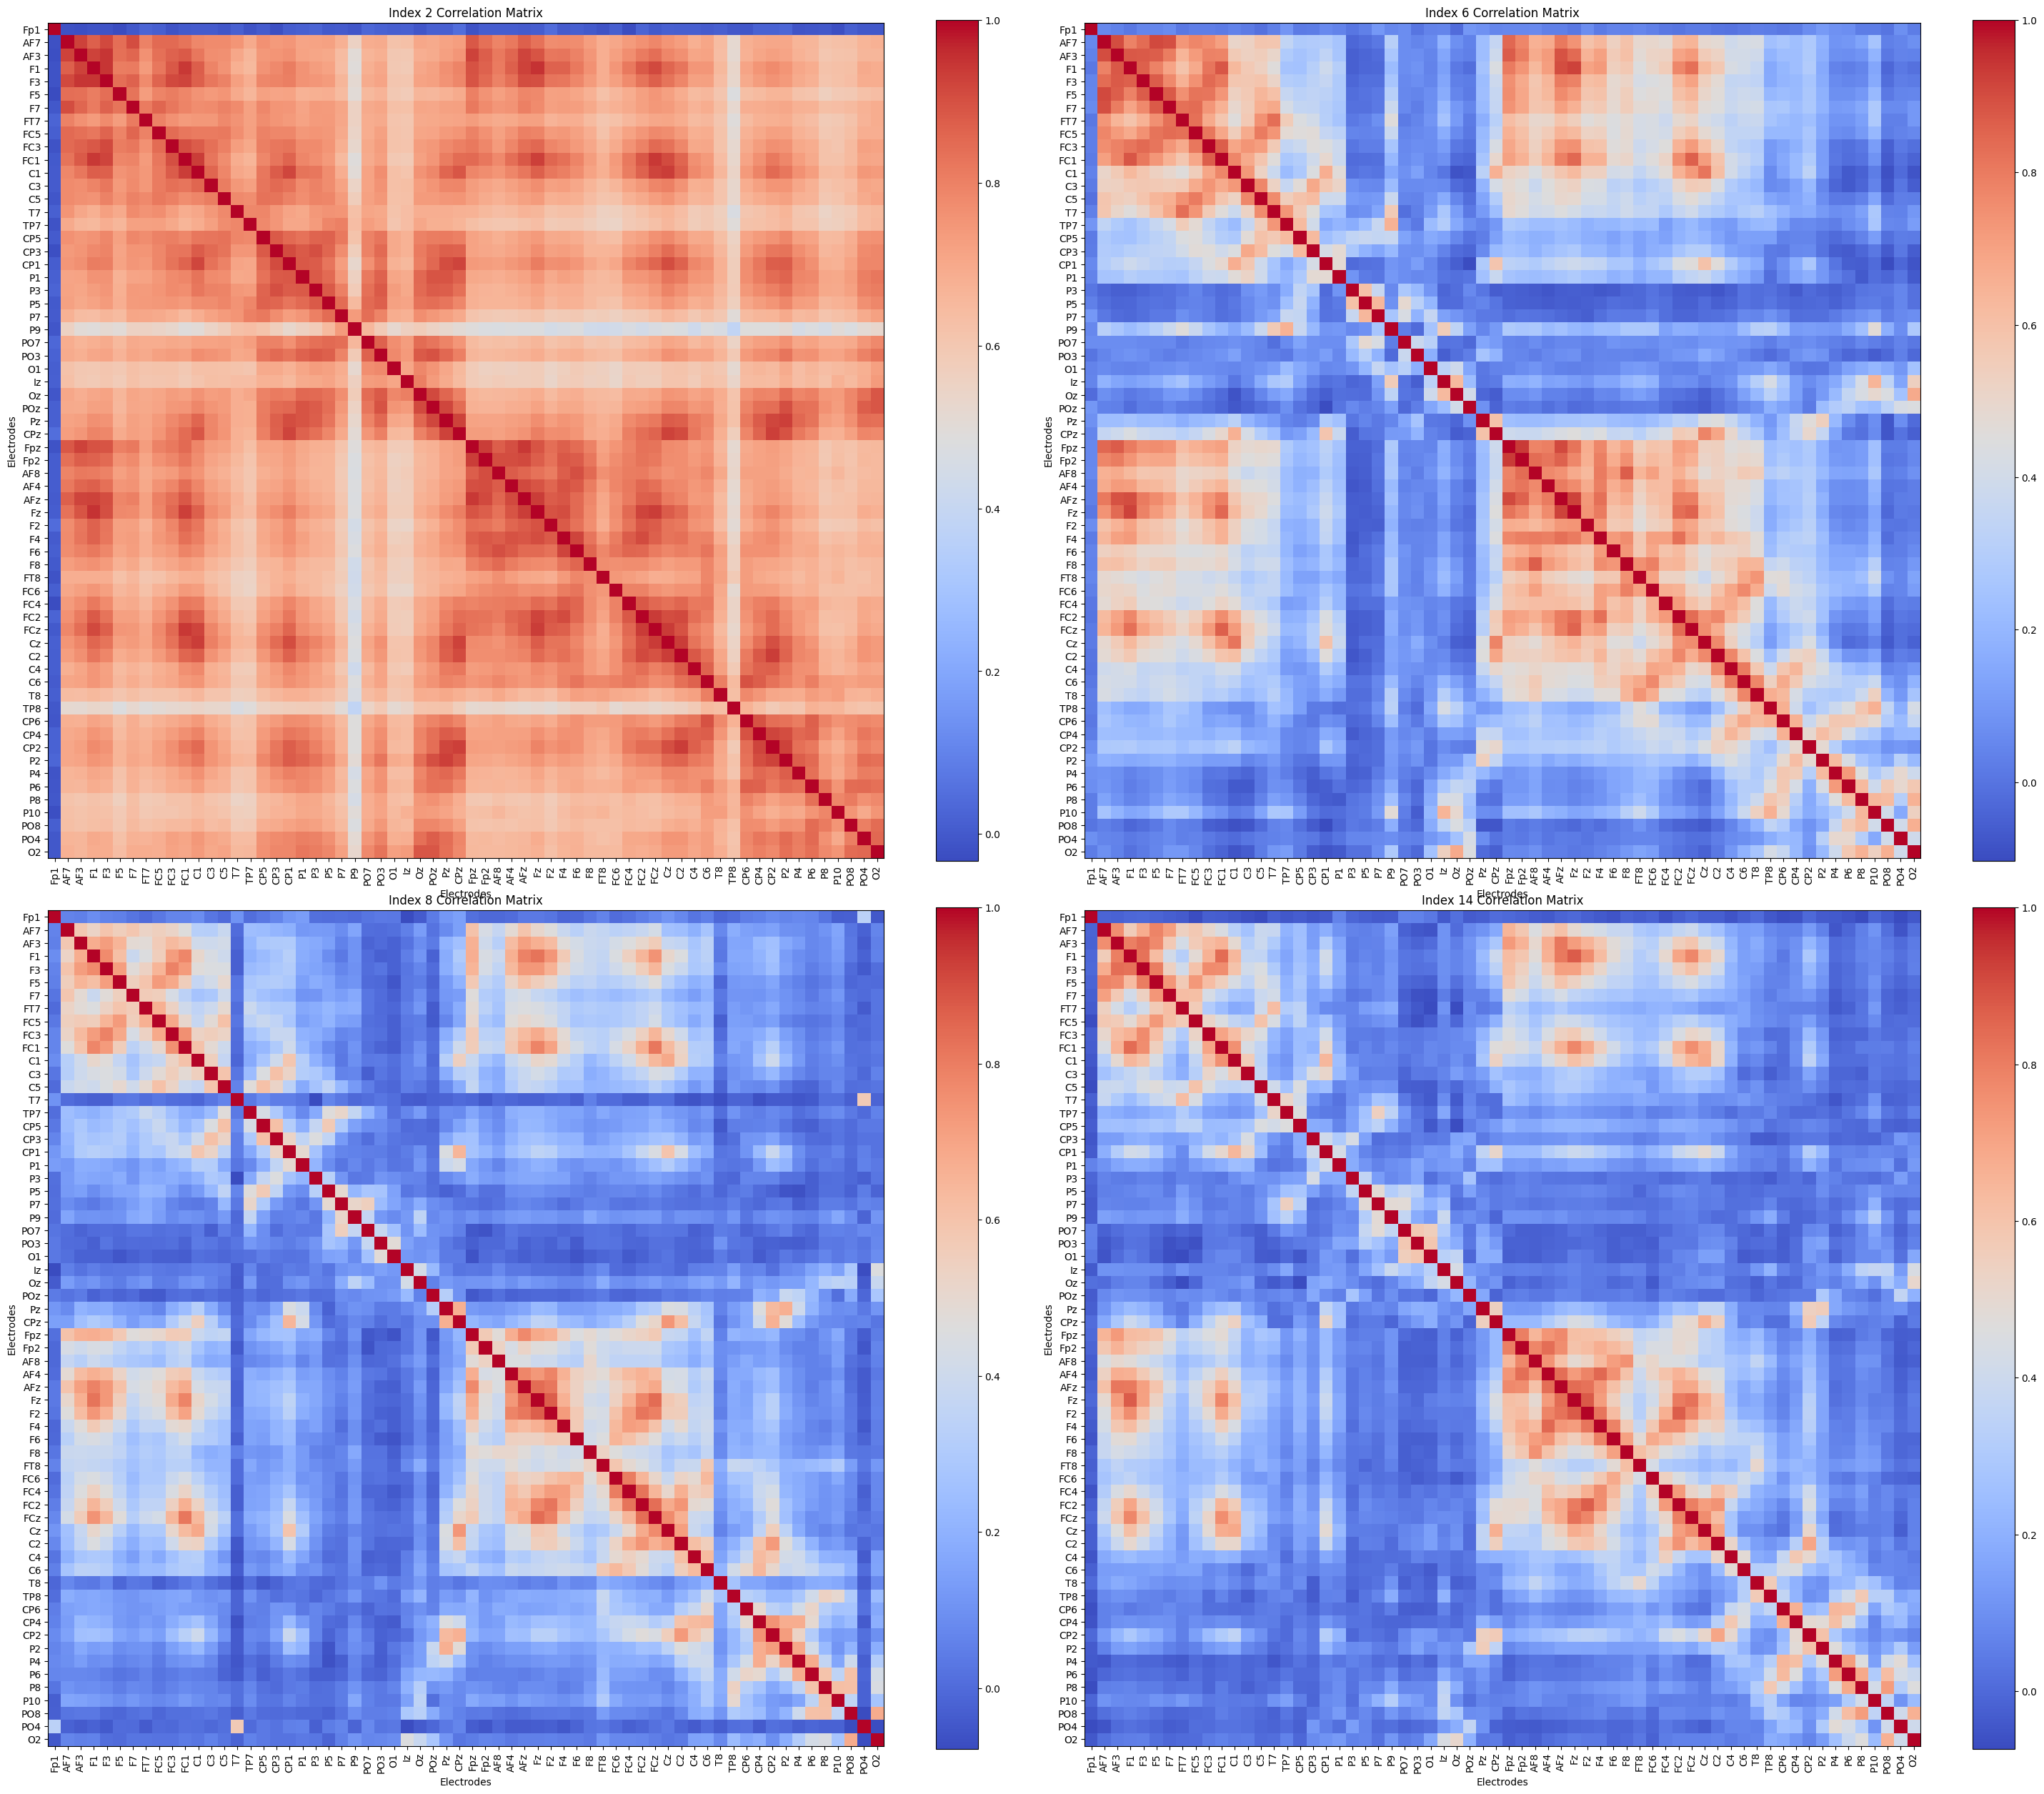

In [71]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 25))

# Loop over the indices in index_list1
for i, ax in zip(index_list3, axs.flatten()):
    # Assuming itcD is your data array
    data = itcD[i].data  # Shape: (64, 22, 2561)

    # Reshape data to (electrodes, features) where features are frequency-time combinations
    reshaped_data = data.reshape(data.shape[0], -1)

    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(reshaped_data)

    # Plot the correlation matrix in the current subplot
    im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    ax.set_title(f'Index {i} Correlation Matrix')
    ax.set_xticks(np.arange(len(channel_names)))
    ax.set_yticks(np.arange(len(channel_names)))
    ax.set_xticklabels(channel_names, rotation=90)
    ax.set_yticklabels(channel_names)
    ax.set_xlabel('Electrodes')
    ax.set_ylabel('Electrodes')
    fig.colorbar(im, ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


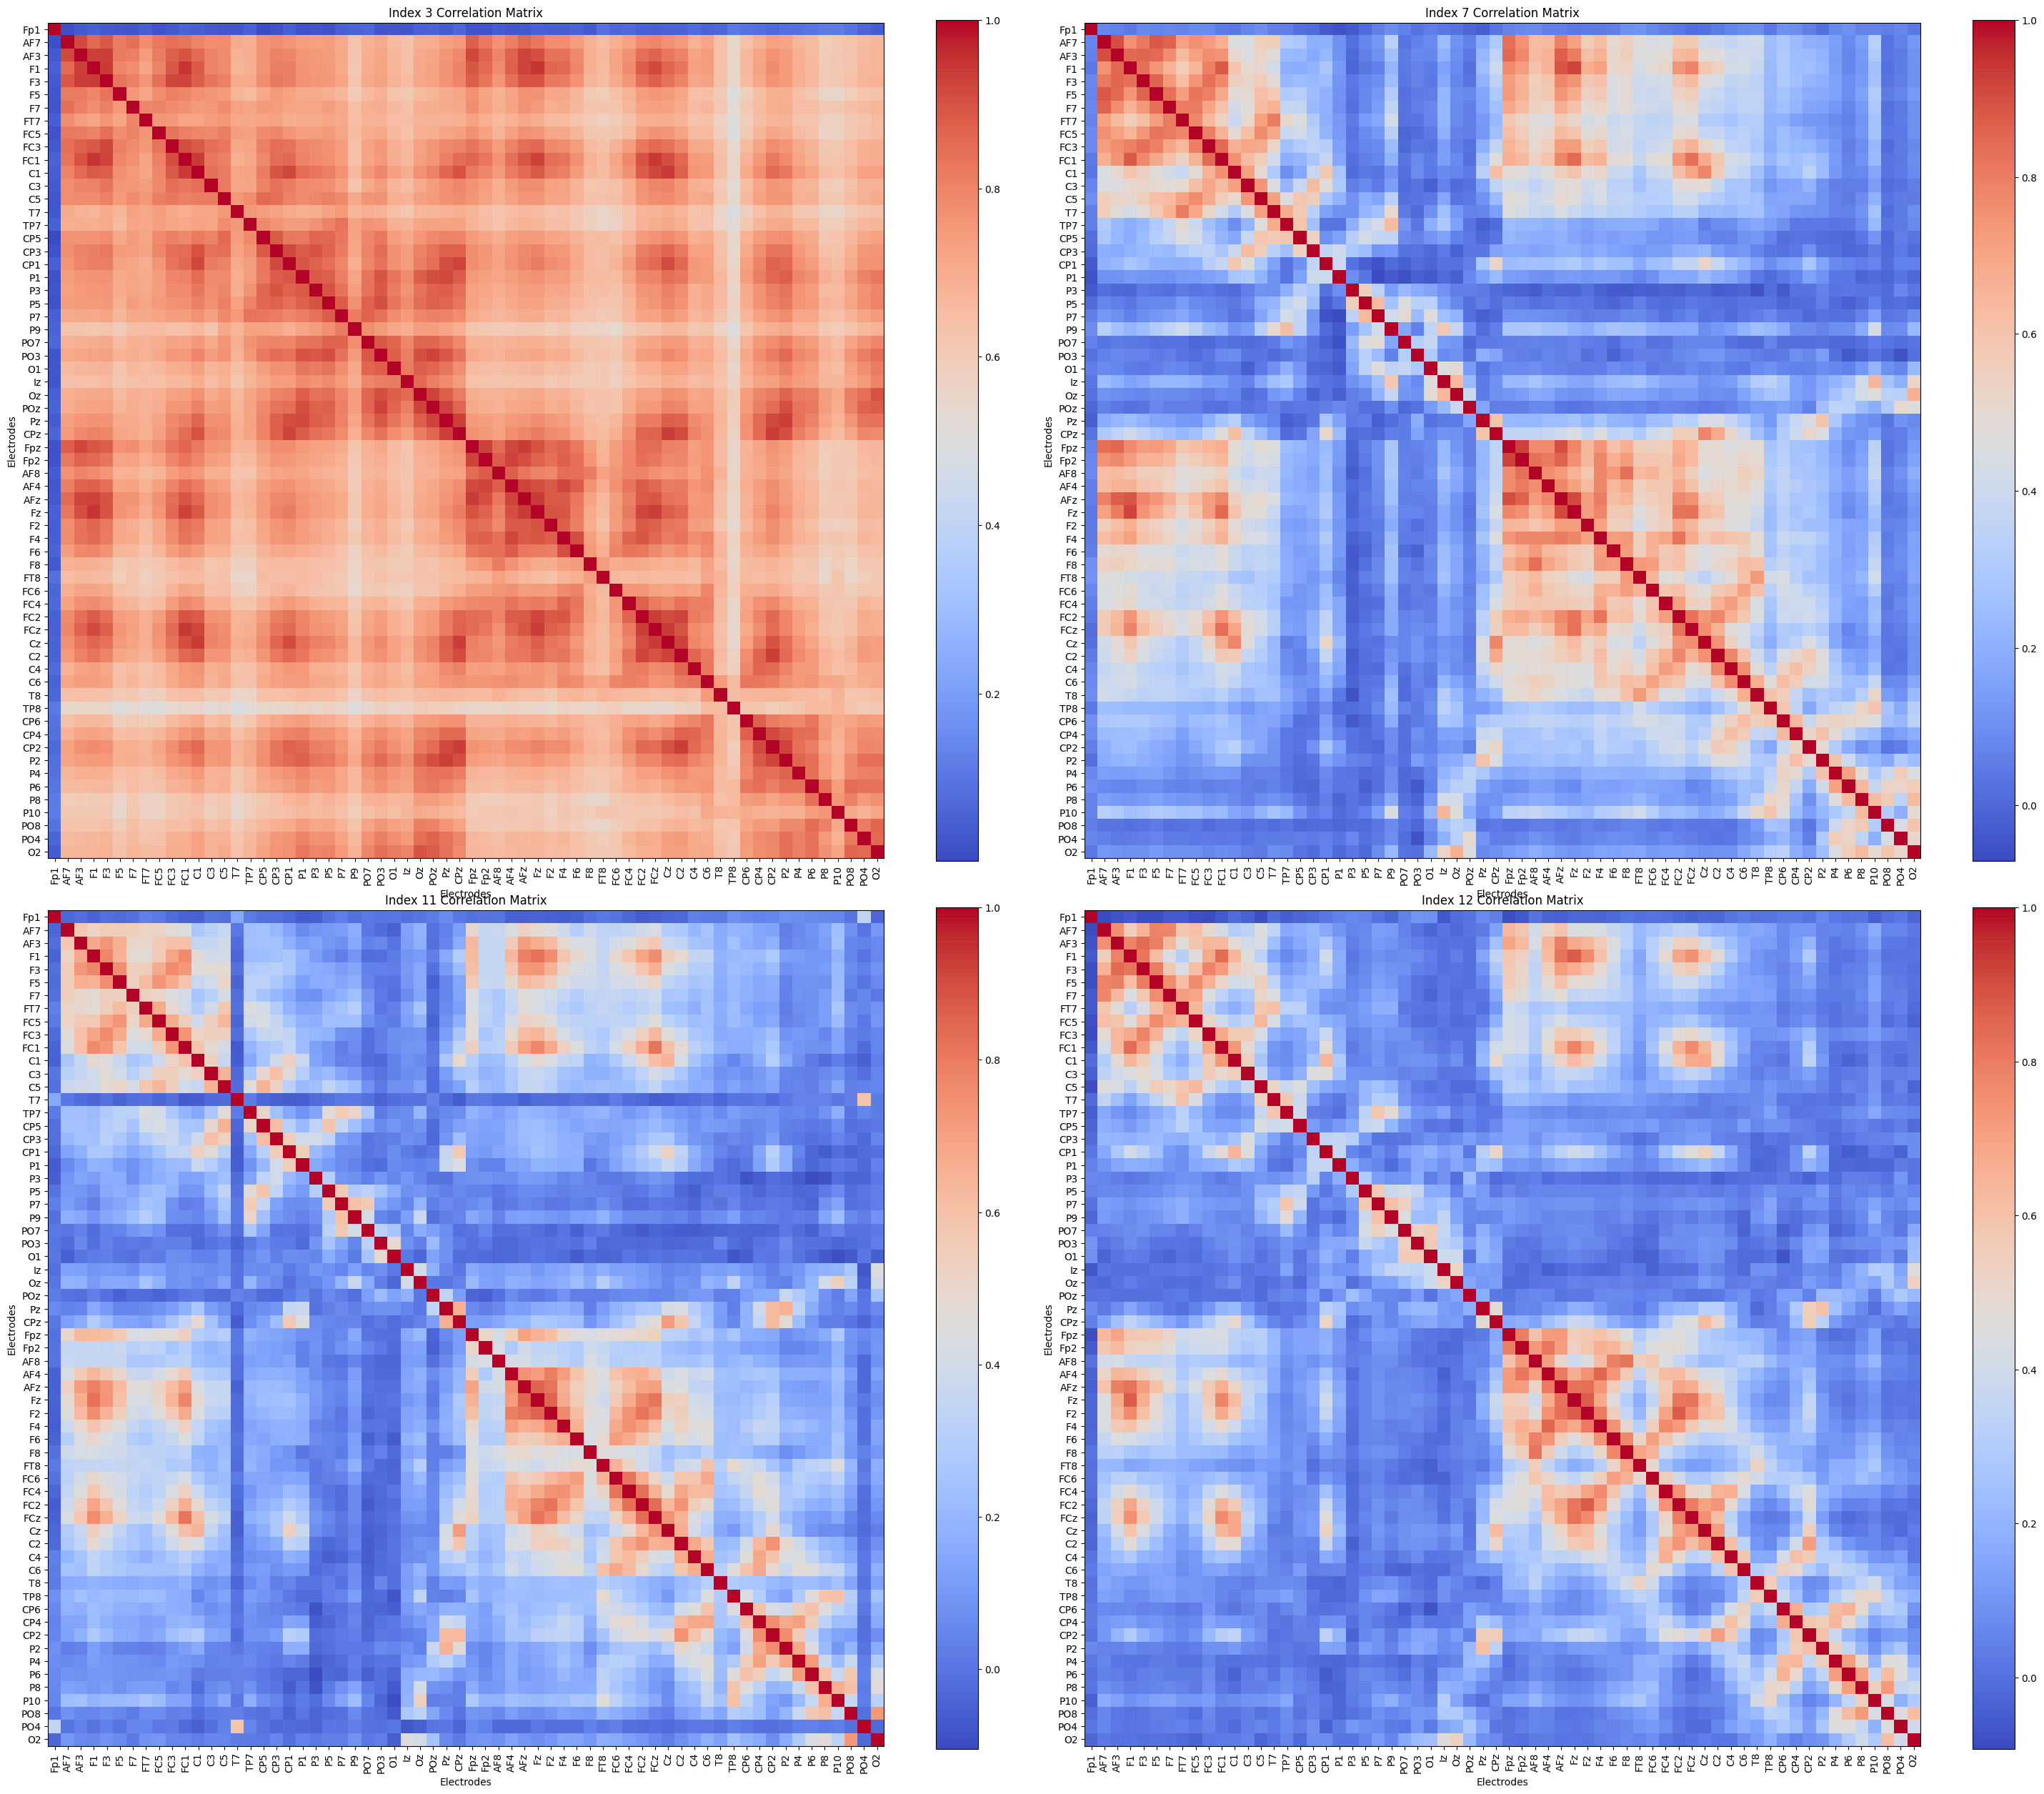

In [72]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(30, 25))

# Loop over the indices in index_list1
for i, ax in zip(index_list4, axs.flatten()):
    # Assuming itcD is your data array
    data = itcD[i].data  # Shape: (64, 22, 2561)

    # Reshape data to (electrodes, features) where features are frequency-time combinations
    reshaped_data = data.reshape(data.shape[0], -1)

    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(reshaped_data)

    # Plot the correlation matrix in the current subplot
    im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    ax.set_title(f'Index {i} Correlation Matrix')
    ax.set_xticks(np.arange(len(channel_names)))
    ax.set_yticks(np.arange(len(channel_names)))
    ax.set_xticklabels(channel_names, rotation=90)
    ax.set_yticklabels(channel_names)
    ax.set_xlabel('Electrodes')
    ax.set_ylabel('Electrodes')
    fig.colorbar(im, ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
